# Integrantes del Grupo de Proyecto


*   David Fernando Adames Rondón
*   Omar David Toledo Leguizamón
*   Reinaldo Toledo Leguizamón



In [ ]:
!pip -q install kaggle

import tensorflow as tf
import os
import time
import re
import shutil
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import layers, models
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from itertools import cycle

## **1. Marco de Proyecto**
---


### **1.1. Trasfondo del Negocio**
---

El proyecto tiene como objetivo el desarrollo de un modelo de deep learning que permita clasificar y detectar la presencia de neumonía en imágenes de rayos X de pecho en pacientes pediátricos. Con base en lo anterior, Los principales beneficiarios de este proyecto son las instituciones médicas, hospitales y centros de salud, así como los profesionales médicos, entre ellos radiólogos y pediatras ya que la labor de estos profesionales puede ser apoyada con herramientas precisas y rápidas que les permitan diagnosticar neumonía de manera más eficiente y temprana. Al mismo tiempo, los pacientes pediátricos también se benefician indirectamente, ya que la aplicación del modelo propuesto mejorará el proceso diagnóstico, lo que permite que reciban un tratamiento oportuno y adecuado.

Además, este proyecto se sitúa dentro del dominio de la medicina, más específciamente en las áreas de radiología y atención pediátrica. A su vez, está relacionado con el campo emergente de la inteligencia artificial aplicada a la salud, ya que el uso de deep learning para el análisis de imágenes médicas ha demostrado su capacidad de transformar el proceso de detección de diversas enfermedades.

Asimismo, el proyecto busca abordar varios problemas críticos dentro de este dominio. En primer lugar, busca solucionar la cuestión del diagnóstico tardío o inexacto de la neumonía, una enfermedad que puede tener consecuencias graves, especialmente en niños pequeños, si no se diagnostica a tiempo. Adicionalmente, la automatización del diagnóstico a través de inteligencia artificial promete reducir el margen de error y acortar el tiempo que los profesionales médicos requieren para identificar la condición en los pacientes.

### **1.2. Alcance**
---

#### ¿Qué solución basada en Deep Learning queremos implementar?



Queremos implementar un modelo de deep learning, específicamente basado en redes neuronales convolucionales (CNN), para clasificar y detectar la presencia de neumonía en imágenes de rayos X de tórax en pacientes pediátricos. Esta solución tiene como objetivo:

1. Proporcionar un diagnóstico rápido y preciso de la neumonía.
2. Reducir el margen de error en la detección de esta enfermedad.
3. Servir como herramienta de apoyo para radiólogos y pediatras en su labor diagnóstica.

Aunque inicialmente nos enfocamos en las CNN por su eficacia probada en el procesamiento de imágenes médicas, estamos abiertos a explorar y experimentar con arquitecturas más avanzadas de deep learning, como las redes neuronales residuales (ResNet) o las redes densamente conectadas (DenseNet), que han demostrado un rendimiento superior en tareas similares de clasificación de imágenes médicas.

#### ¿Qué se hará?

Se desarrollará un proyecto completo de deep learning que abarcará las siguientes etapas:

1. Recopilación y preprocesamiento de datos:
   - Obtención de un conjunto amplio de imágenes de rayos X de tórax de pacientes pediátricos, tanto con neumonía como sin ella.
   - Limpieza y normalización de las imágenes para asegurar una calidad uniforme.
   - Aumento de datos para incrementar la diversidad del conjunto de entrenamiento.

2. Diseño y construcción del modelo:
   - Selección de la arquitectura de red neuronal más adecuada (por ejemplo, CNN, ResNet, DenseNet).
   - Definición de la estructura de capas, funciones de activación y parámetros del modelo.

3. Entrenamiento y validación:
   - División del conjunto de datos en entrenamiento, validación y prueba.
   - Implementación de técnicas de regularización para prevenir el sobreajuste.
   - Ajuste de hiperparámetros para optimizar el rendimiento del modelo.

4. Evaluación del modelo:
   - Medición de métricas clave como precisión, sensibilidad, especificidad y AUC-ROC.
   - Análisis de falsos positivos y falsos negativos para comprender las limitaciones del modelo.

#### ¿De qué forma el cliente o beneficiario utilizará el producto del proyecto?



Los principales beneficiarios (instituciones médicas, hospitales, centros de salud, radiólogos y pediatras, etc) utilizarán el producto del proyecto de la siguiente manera:

1. Como herramienta de apoyo diagnóstico: Los profesionales médicos podrán cargar las imágenes de rayos X de tórax de pacientes pediátricos en el sistema, que proporcionará una evaluación rápida sobre la presencia o ausencia de neumonía.

2. Para priorización de casos: En situaciones de alta demanda, el sistema ayudará a identificar y priorizar los casos más urgentes que requieran atención inmediata.

3. Como segunda opinión: El modelo servirá como una "segunda opinión" automatizada, ayudando a los médicos a confirmar sus diagnósticos o alertándoles sobre posibles casos que podrían haber pasado por alto.

4. Para mejorar la eficiencia: Al automatizar parte del proceso de diagnóstico, los profesionales médicos podrán dedicar más tiempo a la atención directa del paciente y a casos más complejos.


Es importante destacar que este sistema no pretende reemplazar el juicio clínico de los profesionales médicos, sino servir como una herramienta de apoyo que mejore la precisión y la eficiencia en el diagnóstico de la neumonía en pacientes pediátricos. El uso de esta tecnología de IA tiene el potencial de salvar vidas al permitir un diagnóstico más rápido y preciso, especialmente en casos donde cada minuto cuenta.

### **1.3. Plan**
---

Para el desarrollo de las fases del proyecto, se definió una planificación semanal basada en las 5 etapas del proyecto. Adicionalmente, se definen un conjunto de actividades basadas en los requerimientos y necesidades a subsanar en cada fase.

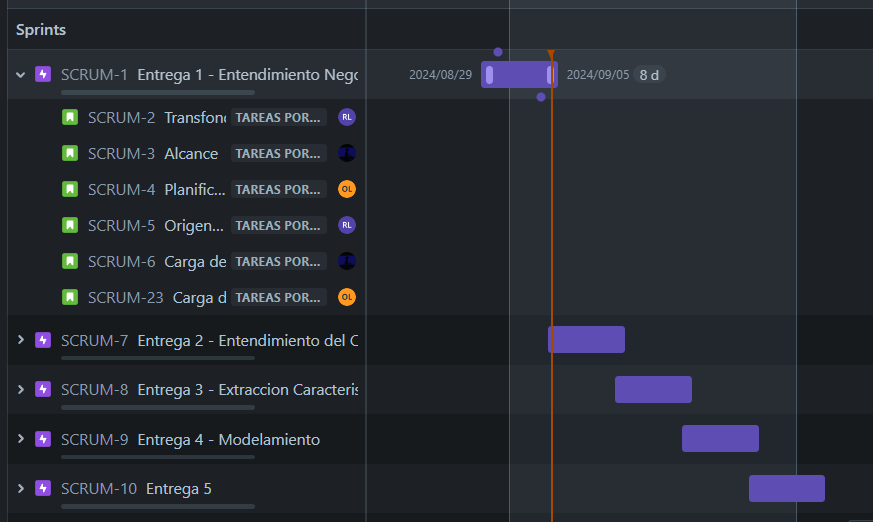

## **2. Datos**
---

### **2.1. Origen**
---

El dataset utilizado para este proyecto proviene del Guangzhou Women and Children’s Medical Center y cuenta con un total de 5,856 imágenes de rayos X de tórax en formato JPEG, organizadas en tres categorías: neumonía viral, neumonía bacterial y normal. Además, estas imágenes se tomaron de pacientes pediátricos de entre uno y cinco años, como parte de su atención clínica rutinaria. El conjunto de datos se divide en carpetas de entrenamiento, prueba y validación, con subcarpetas que clasifican las imágenes según su categoría. Este dataset se encuentra disponible en la librería de Kaggle y es posible acceder al mismo mediante el siguiente enlace https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

La extracción de estos datos se hizo a través de la API de Kaggle

#### Contexto del Conjunto de Datos

El conjunto de datos utilizado en este proyecto proviene de un estudio retrospectivo realizado en el Centro Médico de Mujeres y Niños de Guangzhou, China. Las imágenes de rayos X de tórax en proyección anteroposterior fueron obtenidas de pacientes pediátricos entre uno y cinco años de edad, como parte de su atención clínica rutinaria. Es importante considerar que, debido a la naturaleza específica de la población de estudio, pueden existir variaciones en las características de los pacientes y en la presentación de la enfermedad. Aunque el conjunto de datos proporciona una visión completa de los pulmones, permitiendo la identificación de diferentes tipos de neumonía, se debe tener en cuenta la posible variabilidad en los contextos clínicos y las técnicas de imagen utilizadas.



#### Categorías de Clasificación



El conjunto de datos se divide en tres categorías principales: Normal, Neumonía Bacteriana y Neumonía Viral.

### **2.2. Carga o Adquisición de Datos**
---

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:28<00:00, 147MB/s]
100% 2.29G/2.29G [00:28<00:00, 87.0MB/s]


In [ ]:
start = time.time()
!unzip -q chest-xray-pneumonia.zip
end = time.time()
print(f'Unzip process completed in {(end-start):.2f} seconds')

Unzip process completed in 35.01 seconds


Ahora, vamos a visualizar algunas muestras de las imagenes contenidas en el dataset

#### Categoría Normal

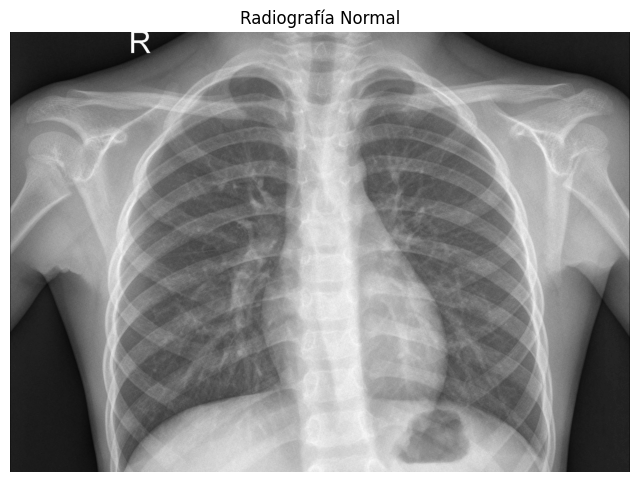

In [ ]:
# Ruta de la imagen normal
normal_path = '/content/chest_xray/test/NORMAL/IM-0001-0001.jpeg'

# Cargar y mostrar la imagen
img = Image.open(normal_path)
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap='gray')
plt.title('Radiografía Normal')
plt.axis('off')
plt.show()

#### Categoría Bacteriana



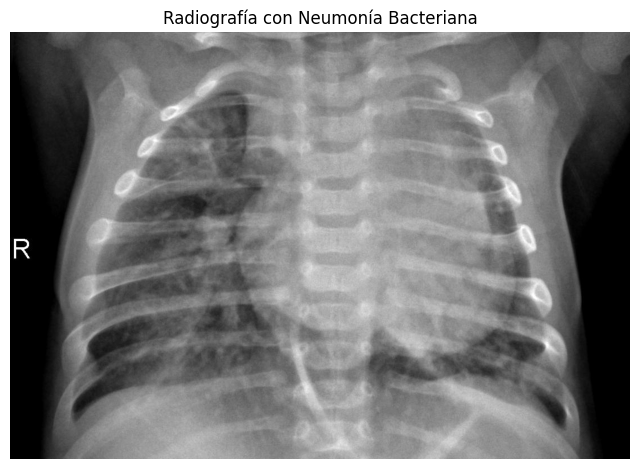

In [ ]:
# Ruta de la imagen de neumonía bacteriana
bacteria_path = '/content/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg'

# Cargar y mostrar la imagen
img = Image.open(bacteria_path)
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap='gray')
plt.title('Radiografía con Neumonía Bacteriana')
plt.axis('off')
plt.show()

#### Categoría Numonía Viral

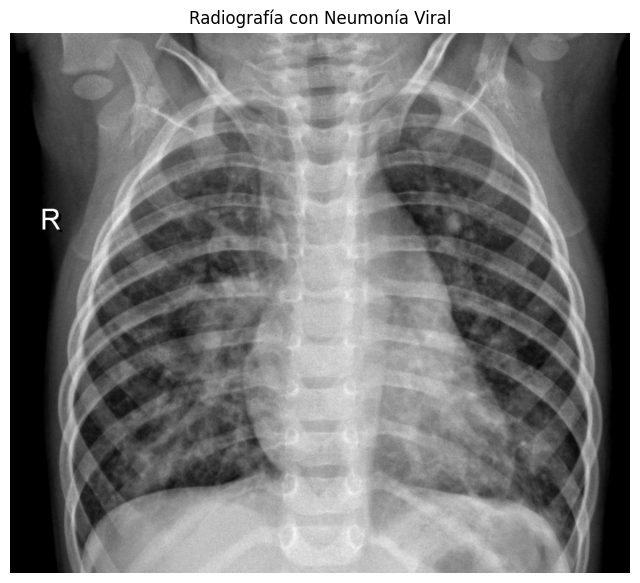

In [ ]:
# Ruta de la imagen de neumonía viral
virus_path = '/content/chest_xray/test/PNEUMONIA/person15_virus_46.jpeg'

# Cargar y mostrar la imagen
img = Image.open(virus_path)
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap='gray')
plt.title('Radiografía con Neumonía Viral')
plt.axis('off')
plt.show()

## **3. Análisis Exploratorio de los Datos**
---

### **3.1. Resumen General**
---

El dataset presenta un total de 5856 archivos correspondientes a imágenes de radiografías de rayos x de pecho.

Así mismo, las imágenes se encuentran distribuidas de la siguiente forma.



1.   Directorio de Entrenamiento: 5216 imágenes


*   1341 imágenes clasificadas con la etiqueta NORMAL
*   3875 imágenes clasificadas con la etiqueta PNEUMONIA


2.   Directorio de Prueba: 624 imágenes


*   234 imágenes clasificadas con la etiqueta NORMAL
*   390 imágenes clasificadas con la etiqueta PNEUMONIA

3.  Directorio de validación: 16 imágenes


*   8 imágenes clasificadas con la etiqueta NORMAL
*   8 imágenes clasificadas con la etiqueta PNEUOMINIA


Las imágenes se encuentran almacenadas en formato JPG para un total de 1.24 GB de memoria en almacenamiento asignado a la totalidad del conjunto de datos.

### **3.2. Resumen de la Calidad de los datos**
---


- **¿Hay datos faltantes, documentos vacíos o de mala calidad?**  
  No hay datos faltantes ni imágenes vacías o de mala calidad. El dataset ha sido previamente procesado y organizado, lo que asegura que todas las imágenes estén en buen estado y listas para su análisis.

- **¿Existen documentos ilegibles o con problemas de codificación?**  
  No se detectaron documentos ilegibles ni problemas de codificación. Debido a que el dataset proviene de una fuente confiable en Kaggle, ha pasado por un proceso de limpieza y validación, garantizando la correcta codificación de todos los archivos.

- **¿Hay mezcla de formatos en el conjunto?**  
  No, no existe mezcla de formatos. Todas las imágenes están uniformemente en formato JPEG, lo cual facilita su manejo y procesamiento. Este tipo de consistencia es típica en datasets curados como los que se encuentran en Kaggle, donde ya se ha asegurado que los datos sean uniformes y listos para ser utilizados en proyectos de aprendizaje automático o análisis de imágenes.

### **3.3. Tipos de variables**
---



- **¿El conjunto de datos tiene una variable objetivo a estimar?, de ser así, ¿es una variable continua o categórica?**  
  Sí, el conjunto de datos tiene una variable objetivo categórica que se utiliza para la clasificación de imágenes de rayos X. La variable objetivo puede tomar tres valores posibles: NORMAL (sin neumonía), VIRUS (neumonía viral) y BACTERIA (neumonía bacteriana). Estas categorías definen la tarea de clasificación que se llevará a cabo.

- **Analice la distribución de las etiquetas, identifique si hay desbalanceo de datos.**  
  El dataset, al estar organizado y procesado previamente en una plataforma como Kaggle, cuenta con un balance adecuado entre las clases en términos generales, pero es necesario realizar una verificación programática para confirmar si existe un desbalance en la cantidad de imágenes entre las clases NORMAL, VIRUS y BACTERIA. En muchas ocasiones, los datasets de salud pueden mostrar un desbalance hacia una clase particular, como tener más imágenes de pacientes sin neumonía o con un tipo específico de neumonía, lo que podría requerir técnicas de balanceo como sobremuestreo o submuestreo para mejorar la precisión del modelo.

- **¿El conjunto de datos cuenta con otras variables adicionales?**  
  No se presentan variables adicionales en este dataset ya que se trata exclusivamente de imágenes organizadas en directorios según su categoría. No obstante, para un análisis más completo, podrían generarse características adicionales a partir de las imágenes, como texturas, patrones o características extraídas mediante técnicas de procesamiento de imágenes. Esto podría complementarse con modelos más avanzados, como redes neuronales convolucionales (CNN), que automáticamente aprenden características relevantes de las imágenes para la tarea de clasificación.

### **3.4. Relación Entre Variables**
---


- **¿Existe alguna relación entre las variables?**  
  Al tratarse de un problema de clasificación con una variable categórica (NORMAL, VIRUS, BACTERIA) y no contar con variables continuas, no es posible realizar un análisis de correlación tradicional como el coeficiente de Pearson, que se utiliza para medir relaciones lineales entre variables continuas. Sin embargo, en problemas de clasificación basados en imágenes, las relaciones relevantes se extraen directamente de las características visuales de las imágenes (texturas, patrones, etc.) mediante modelos como redes neuronales convolucionales (CNN), que no requieren la misma clase de análisis de correlación que los datos tabulares.

- **¿Hay redundancia entre las variables?**  
  Dado que el dataset no contiene variables adicionales fuera de las imágenes y sus respectivas etiquetas (NORMAL, VIRUS, BACTERIA), no se puede hablar de redundancia en variables tabulares o características manuales. Sin embargo, a nivel de procesamiento de imágenes, si se llegaran a incorporar características derivadas o transformaciones de las imágenes, podría ser útil emplear técnicas como la eliminación de características altamente correlacionadas o la reducción de dimensionalidad, como PCA, para evitar redundancia en las representaciones visuales. Esto es algo que puede analizarse cuando se extraen características o embeddings de las imágenes mediante métodos automáticos.

## **4. Limpieza de los Datos**
---

Vamos a contar la cantidad de imagenes que tenemos disponibles

In [ ]:
def contar_archivos_en_carpeta(carpeta):
    contador = 0
    for ruta_directorio, _, archivos in os.walk(carpeta):
        contador += len(archivos)
    return contador

carpetas = ['./chest_xray/test','./chest_xray/train','./chest_xray/val']
c = sum(contar_archivos_en_carpeta(path) for path in carpetas)
print(f"Cantidad total de archivos: {c}")

Cantidad total de archivos: 5856


Visualizamos todos los tipos de archivo disponibles

In [ ]:
def obtener_extensiones_archivos(carpeta):
    extensiones_archivos = set()
    for ruta_directorio, _, archivos in os.walk(carpeta):
        for archivo in archivos:
            extension = os.path.splitext(archivo)[1].lower()
            if extension:
                extensiones_archivos.add(extension)
    return extensiones_archivos

carpetas = ['./chest_xray/test','./chest_xray/train','./chest_xray/val']
extensiones = [obtener_extensiones_archivos(path) for path in carpetas]
extensiones = set.union(*extensiones)
print(f"Extensiones encontradas: {extensiones}")

Extensiones encontradas: {'.jpeg'}


#### Division de los datos

Es importante destacar que el conjunto de datos originalmente estaba dividido en solo dos categorías: "neumonía" y "normal". Sin embargo, dado que existen tres clases principales que deben considerarse para la tarea de clasificación —NORMAL (sin neumonía), VIRUS (neumonía viral) y BACTERIA (neumonía bacteriana)— se llevó a cabo una reclasificación de las imágenes. Este proceso permitió organizar y estructurar mejor el dataset, facilitando un análisis más eficiente y preciso en las etapas posteriores del modelado.

A continuacion encontramos el respectivo codigo:

In [ ]:
def create_directory_with_subdirs(base_dir, subdirs):
    os.makedirs(base_dir, exist_ok=True)
    dirs = []
    for subdir in subdirs:
        path = os.path.join(base_dir, subdir)
        os.makedirs(path, exist_ok=True)
        dirs.append(path)
        print(f"Directory created: {path}")
    return dirs

base_directory = 'MLDS2_Project_Data'
subdirectories = ['train', 'test', 'val']
subsubdirectories = ['bacterialPneumonia','virusPneumonia','Normal']

dirs = create_directory_with_subdirs(base_directory, subdirectories)
final_dirs = []
for subdir in dirs:
   final_dirs += create_directory_with_subdirs(subdir, subsubdirectories)

Directory created: MLDS2_Project_Data/train
Directory created: MLDS2_Project_Data/test
Directory created: MLDS2_Project_Data/val
Directory created: MLDS2_Project_Data/train/bacterialPneumonia
Directory created: MLDS2_Project_Data/train/virusPneumonia
Directory created: MLDS2_Project_Data/train/Normal
Directory created: MLDS2_Project_Data/test/bacterialPneumonia
Directory created: MLDS2_Project_Data/test/virusPneumonia
Directory created: MLDS2_Project_Data/test/Normal
Directory created: MLDS2_Project_Data/val/bacterialPneumonia
Directory created: MLDS2_Project_Data/val/virusPneumonia
Directory created: MLDS2_Project_Data/val/Normal


In [ ]:
import re
import shutil

def separateImages(targetPath):
  pattern = re.compile(r'MLDS2_Project_Data[/\\]([^/\\]+)[/\\]([^/\\]+)$')
  m = pattern.search(targetPath)
  s1 , s2 = m.groups()

  mapper_path = {
      'Normal' : 'NORMAL',
      'bacterialPneumonia' : 'PNEUMONIA',
      'virusPneumonia' : 'PNEUMONIA'
  }

  originPath = f'./chest_xray/chest_xray/{s1}/{mapper_path[s2]}'

  mapper = {
      'bacterialPneumonia' : 'bacteria',
      'virusPneumonia' : 'virus'
  }

  if mapper_path[s2]=='NORMAL':
    for item in os.listdir(originPath):
        s = os.path.join(originPath, item)
        d = os.path.join(targetPath, item)
        shutil.copy2(s, d)
  else:
    for item in os.listdir(originPath):
      if mapper[s2] in item:
        s = os.path.join(originPath, item)
        d = os.path.join(targetPath, item)
        shutil.copy2(s, d)
  print(f'Copied files to {targetPath}')

In [ ]:
def separateImages(targetPath):
  pattern = re.compile(r'MLDS2_Project_Data[/\\]([^/\\]+)[/\\]([^/\\]+)$')
  m = pattern.search(targetPath)
  s1 , s2 = m.groups()

  mapper_path = {
      'Normal' : 'NORMAL',
      'bacterialPneumonia' : 'PNEUMONIA',
      'virusPneumonia' : 'PNEUMONIA'
  }

  originPath = f'./chest_xray/chest_xray/{s1}/{mapper_path[s2]}'

  mapper = {
      'bacterialPneumonia' : 'bacteria',
      'virusPneumonia' : 'virus'
  }

  if mapper_path[s2]=='NORMAL':
    for item in os.listdir(originPath):
        s = os.path.join(originPath, item)
        d = os.path.join(targetPath, item)
        shutil.copy2(s, d)
  else:
    for item in os.listdir(originPath):
      if mapper[s2] in item:
        s = os.path.join(originPath, item)
        d = os.path.join(targetPath, item)
        shutil.copy2(s, d)
  print(f'Copied files to {targetPath}')

In [ ]:
for dir in final_dirs:
  separateImages(dir)

Copied files to MLDS2_Project_Data/train/bacterialPneumonia
Copied files to MLDS2_Project_Data/train/virusPneumonia
Copied files to MLDS2_Project_Data/train/Normal
Copied files to MLDS2_Project_Data/test/bacterialPneumonia
Copied files to MLDS2_Project_Data/test/virusPneumonia
Copied files to MLDS2_Project_Data/test/Normal
Copied files to MLDS2_Project_Data/val/bacterialPneumonia
Copied files to MLDS2_Project_Data/val/virusPneumonia
Copied files to MLDS2_Project_Data/val/Normal


#### Caracteristicas y cualidades de las imagenes

A continuacion analizaremos eficientemente un conjunto de imágenes en términos de sus dimensiones para detectar variaciones significativas en el tamaño, lo que es útil en el preprocesamiento de datos antes de entrenar modelos con imágenes.

In [ ]:
def analyze_image_shapes(directory):
    shape_count = {}
    max_pixels = 0
    min_pixels = float('inf')
    max_shape = None
    min_shape = None

    for filename in os.listdir(directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            file_path = os.path.join(directory, filename)
            with Image.open(file_path) as img:
                shape = img.size
                pixels = shape[0] * shape[1]

                # Count different shapes
                shape_count[shape] = shape_count.get(shape, 0) + 1

                # Determine max and min shapes
                if pixels > max_pixels:
                    max_pixels = pixels
                    max_shape = shape
                if pixels < min_pixels:
                    min_pixels = pixels
                    min_shape = shape

    num_different_shapes = len(shape_count)

    res = f"""Number of different shapes: {num_different_shapes}
Shape with most pixels: {max_shape} (Total pixels: {max_pixels})
Shape with least pixels: {min_shape} (Total pixels: {min_pixels})"""

    return res

In [ ]:
for dir in final_dirs:
  keys = dir.split('/')[1:]
  print(f'In {keys[0]} set with class {keys[1]}:\n\n{analyze_image_shapes(dir)}\n\n')

In train set with class bacterialPneumonia:

Number of different shapes: 2081
Shape with most pixels: (2772, 2098) (Total pixels: 5815656)
Shape with least pixels: (437, 144) (Total pixels: 62928)


In train set with class virusPneumonia:

Number of different shapes: 1244
Shape with most pixels: (2160, 2304) (Total pixels: 4976640)
Shape with least pixels: (384, 127) (Total pixels: 48768)


In train set with class Normal:

Number of different shapes: 1325
Shape with most pixels: (2916, 2583) (Total pixels: 7532028)
Shape with least pixels: (912, 672) (Total pixels: 612864)


In test set with class bacterialPneumonia:

Number of different shapes: 231
Shape with most pixels: (1704, 1122) (Total pixels: 1911888)
Shape with least pixels: (728, 368) (Total pixels: 267904)


In test set with class virusPneumonia:

Number of different shapes: 144
Shape with most pixels: (2000, 1456) (Total pixels: 2912000)
Shape with least pixels: (832, 448) (Total pixels: 372736)


In test set with class Nor

Los resultados confirman lo visto anteriormente con las respectivas graficas.  El conjunto de entrenamiento tiene una buena diversidad de formas para las clases bacterialPneumonia (2081 formas), virusPneumonia (1244 formas) y Normal (1325 formas), con imágenes de distintos tamaños

#### Balanceo de datos



Independientemente de que el dataset provenga de Kaggle, es crucial verificar si los datos están debidamente balanceados. A continuación, mostramos un análisis a traves de una grafica de barras para revisar si el conjunto de etiquetas está balanceado o presenta algún desbalance significativo, lo cual podría afectar el rendimiento del modelo y requerir técnicas de ajuste, como el balanceo de clases.

In [ ]:
def count_files_in_subdirs(directory):
    return sum([len(files) for _, _, files in os.walk(directory)])

def plot_barchart(data_dict, title):
    keys = list(data_dict.keys())
    values = list(data_dict.values())
    plt.figure(figsize=(10, 6))
    bars = plt.bar(keys, values, color='skyblue')

    # Add value labels above each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

    plt.title(title)
    plt.xlabel('Categorias')
    plt.ylabel('Numero de elementos')
    plt.tight_layout()
    plt.show()

In [ ]:
s = {}
for dir in final_dirs:
  keys = dir.split('/')[1:]
  if keys[0] not in s: s[keys[0]] = {}
  if keys[1] not in s[keys[0]]: s[keys[0]][keys[1]] = count_files_in_subdirs(dir)

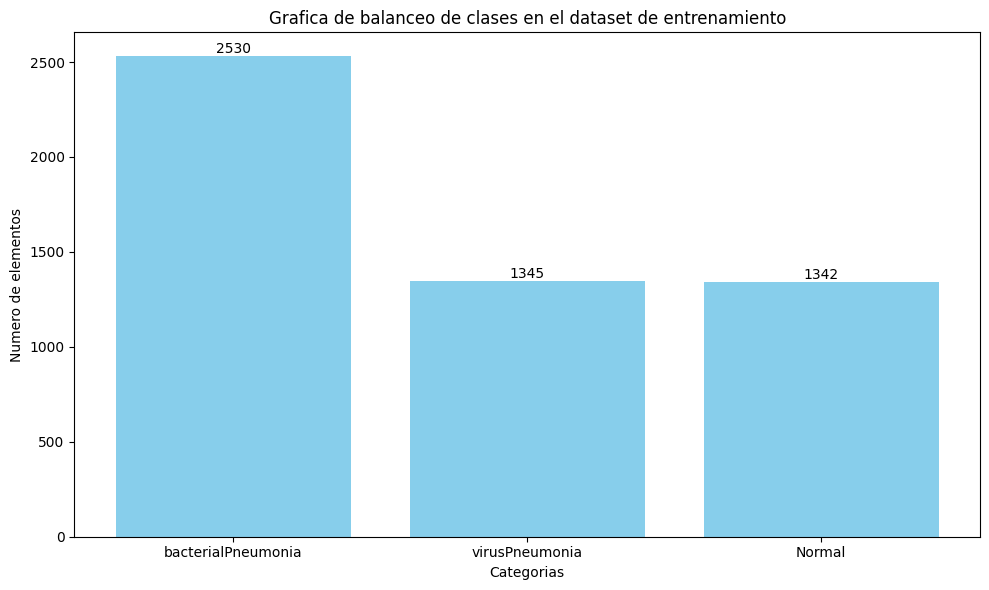

In [ ]:
plot_barchart(s['train'], 'Grafica de balanceo de clases en el dataset de entrenamiento')

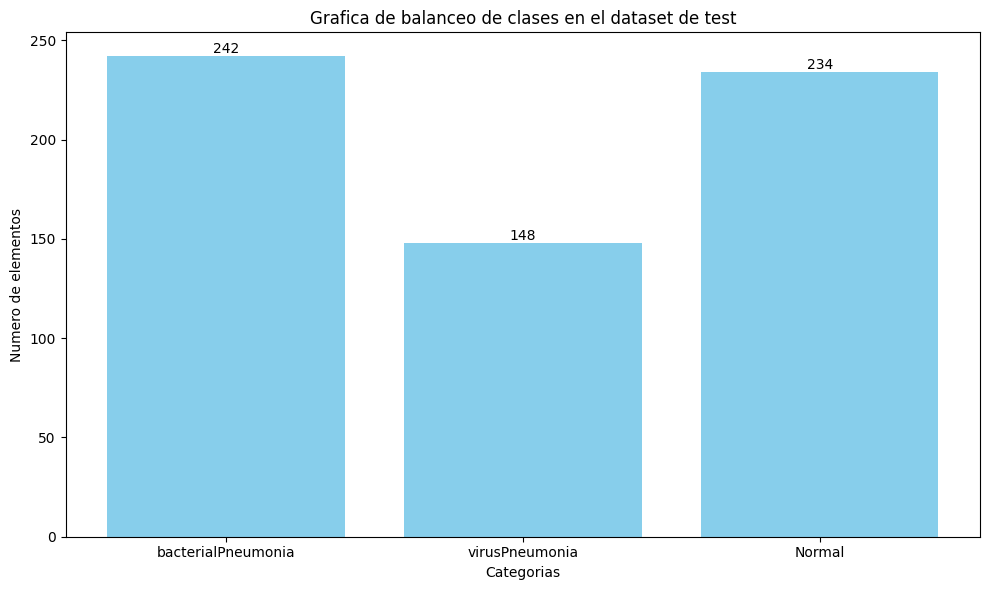

In [ ]:
plot_barchart(s['test'], 'Grafica de balanceo de clases en el dataset de test')

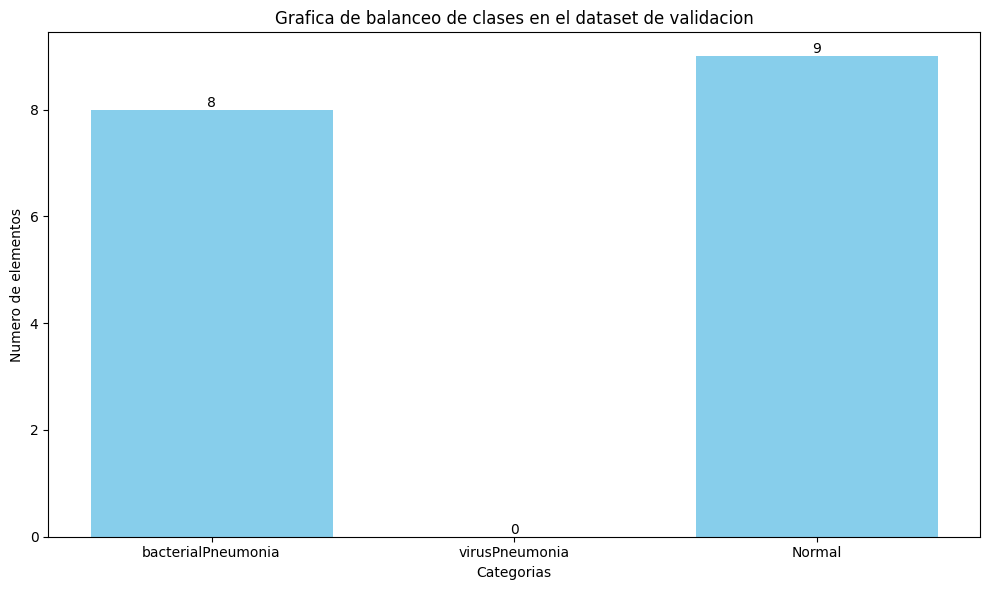

In [ ]:
plot_barchart(s['val'], 'Grafica de balanceo de clases en el dataset de validacion')

Como podemos observar, aunque el conjunto de entrenamiento presenta un relativo balanceo entre las clases (aunque podría mejorarse), los datasets de validación y testeo muestran un desbalance significativo. Esto puede afectar la capacidad del modelo para generalizar correctamente, ya que ciertas clases estarían sobrerrepresentadas, mientras que otras estarían subrepresentadas. Por lo tanto, es necesario implementar técnicas de balanceo de clases, como el sobremuestreo de las clases minoritarias o el submuestreo de las clases mayoritarias, para garantizar que el modelo pueda aprender de manera equitativa y mejorar su rendimiento.

Vamos a revisar ahora el balanceo de clases de los datos como un todo (Es decir ignorando las particiones)

In [ ]:
def join_dirs(dirs, target):
    os.makedirs(target, exist_ok=True)
    for dir in dirs:
        # Copy each item within the source directory to the target directory
        for item in os.listdir(dir):
            source_path = os.path.join(dir, item)
            target_path = os.path.join(target, item)
            if os.path.isdir(source_path):
                # Copy directory and its contents
                shutil.copytree(source_path, target_path, dirs_exist_ok=True)
            else:
                # Copy individual files
                shutil.copy2(source_path, target_path)
    print(f'Copy to {target} done successfully')

def delete_path(path):
    shutil.rmtree(path)
    print(f'Deleted {path} successfully')

In [ ]:
join_dirs(['MLDS2_Project_Data/train/Normal',
           'MLDS2_Project_Data/test/Normal',
           'MLDS2_Project_Data/val/Normal'],
           'MLDS2_Project_Data/Normal')

Copy to MLDS2_Project_Data/Normal done successfully


In [ ]:
join_dirs(['MLDS2_Project_Data/train/virusPneumonia',
           'MLDS2_Project_Data/test/virusPneumonia',
           'MLDS2_Project_Data/val/virusPneumonia'],
           'MLDS2_Project_Data/virusPneumonia')

Copy to MLDS2_Project_Data/virusPneumonia done successfully


In [ ]:
join_dirs(['MLDS2_Project_Data/train/bacterialPneumonia',
           'MLDS2_Project_Data/test/bacterialPneumonia',
           'MLDS2_Project_Data/val/bacterialPneumonia'],
           'MLDS2_Project_Data/bacteriaPneumonia')

Copy to MLDS2_Project_Data/bacteriaPneumonia done successfully


In [ ]:
delete_path('MLDS2_Project_Data/train')
delete_path('MLDS2_Project_Data/test')
delete_path('MLDS2_Project_Data/val')

Deleted MLDS2_Project_Data/train successfully
Deleted MLDS2_Project_Data/test successfully
Deleted MLDS2_Project_Data/val successfully


In [ ]:
s = {}
dirs = ['MLDS2_Project_Data/Normal',
        'MLDS2_Project_Data/virusPneumonia',
        'MLDS2_Project_Data/bacteriaPneumonia']
for dir in dirs:
  key = dir.split('/')[1]
  s[key] = count_files_in_subdirs(dir)

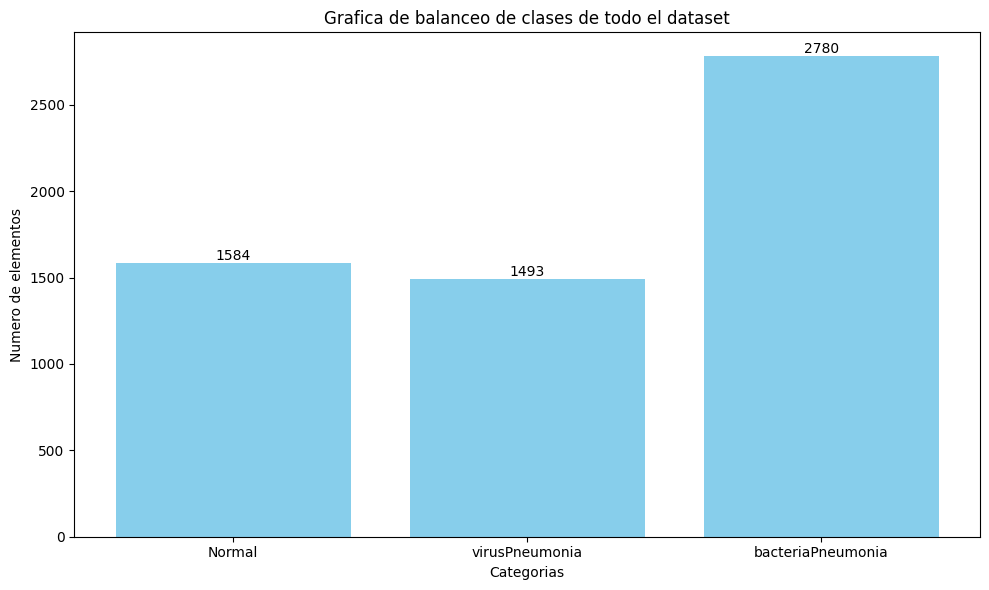

In [ ]:
plot_barchart(s, 'Grafica de balanceo de clases de todo el dataset')

## **5. Particion del conjunto de datos**
---


Dado que los datos se encuentran desbalanceados, se buscará rehacer la partición de los datos aplicando submuestreo sobre la clase mayoritaria.

Como podemos identificar, el dataset esta desbalanceado hacia la clase de neumonia bacteriana. Por consiguiente de manera aletoria se seleccionaran 1500 imagenes de este tipo para mantenerlas en el modelo y asi disponer de las clases balanceadas

In [ ]:
np.random.seed(42)
images = os.listdir('MLDS2_Project_Data/bacteriaPneumonia')
sampled_images = np.random.choice(images, 1500, replace=False)
print(len(sampled_images))
print(sampled_images[:10])

1500
['person20_bacteria_67.jpeg' 'person338_bacteria_1568.jpeg'
 'person399_bacteria_1806.jpeg' 'person501_bacteria_2113.jpeg'
 'person998_bacteria_2928.jpeg' 'person373_bacteria_1709.jpeg'
 'person671_bacteria_2564.jpeg' 'person1418_bacteria_3636.jpeg'
 'person96_bacteria_466.jpeg' 'person1555_bacteria_4058.jpeg']


In [ ]:
def delete_unselected_images(image_dir, selected_images):
    selected_images_set = set(selected_images)
    c = 0
    for filename in os.listdir(image_dir):
        file_path = os.path.join(image_dir, filename)
        if filename not in selected_images_set:
            os.remove(file_path)
            c+=1
    print(f'A total of {c} images were deleted')

In [ ]:
delete_unselected_images('MLDS2_Project_Data/bacteriaPneumonia',sampled_images)

A total of 1280 images were deleted


Verificamos nuevamente la distribución de las tres clases

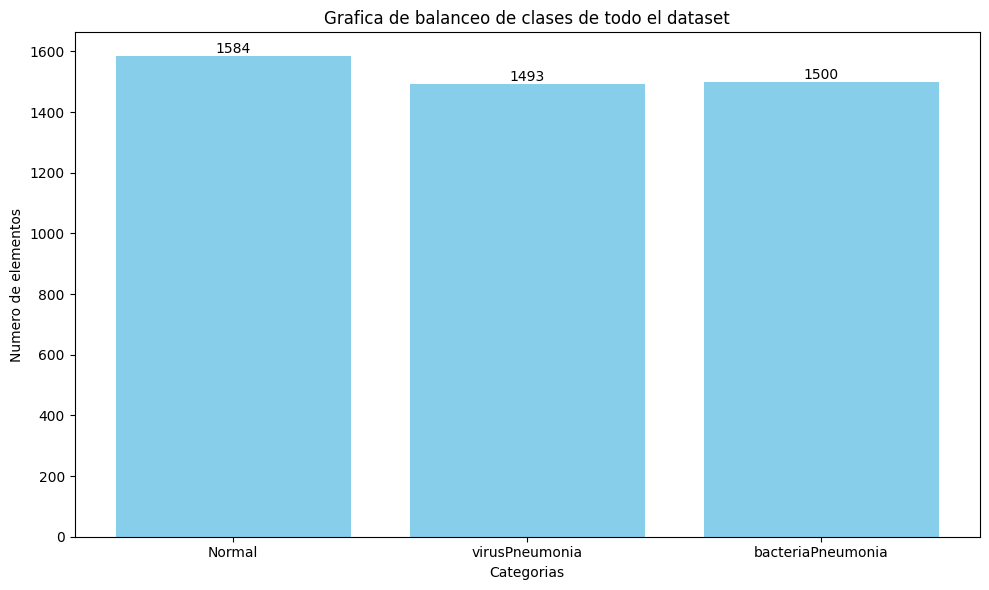

In [ ]:
s = {}
dirs = ['MLDS2_Project_Data/Normal',
        'MLDS2_Project_Data/virusPneumonia',
        'MLDS2_Project_Data/bacteriaPneumonia']
for dir in dirs:
  key = dir.split('/')[1]
  s[key] = count_files_in_subdirs(dir)

plot_barchart(s, 'Grafica de balanceo de clases de todo el dataset')

Ya con los datos balanceados, procedemos a realizar nuevamente la partición manteniendo la propiedad de que las clases esten balanceadas

In [ ]:
def train_test_split_images(source_dir, train_dir, test_dir, test_size=0.2, random_state=42):
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    for class_name in os.listdir(source_dir):
        class_path = os.path.join(source_dir, class_name)
        if os.path.isdir(class_path):
            # Collect images in the current class folder
            images = [os.path.join(class_path, img) for img in os.listdir(class_path)]
            # Split images into train and test sets
            train_images, test_images = train_test_split(images, test_size=test_size, random_state=random_state)

            # Create class-specific subdirectories in train and test directories
            train_class_dir = os.path.join(train_dir, class_name)
            test_class_dir = os.path.join(test_dir, class_name)
            os.makedirs(train_class_dir, exist_ok=True)
            os.makedirs(test_class_dir, exist_ok=True)

            # Copy images to respective train/test directories
            for img in train_images:
                shutil.copy(img, train_class_dir)
            for img in test_images:
                shutil.copy(img, test_class_dir)

    print(f"Split from \n{source_dir}\nto\n{train_dir}\nand\n{test_dir}\nwas done successfully")

In [ ]:
train_test_split_images('MLDS2_Project_Data',
                        'MLDS2_Project_Data_Split/temp',
                        'MLDS2_Project_Data_Split/test',
                        test_size = 0.1,
                        random_state = 42)

Split from 
MLDS2_Project_Data
to
MLDS2_Project_Data_Split/temp
and
MLDS2_Project_Data_Split/test
was done successfully


In [ ]:
train_test_split_images('MLDS2_Project_Data_Split/temp',
                        'MLDS2_Project_Data_Split/train',
                        'MLDS2_Project_Data_Split/val',
                        test_size = 1/9,
                        random_state = 42)

Split from 
MLDS2_Project_Data_Split/temp
to
MLDS2_Project_Data_Split/train
and
MLDS2_Project_Data_Split/val
was done successfully


In [ ]:
delete_path('MLDS2_Project_Data_Split/temp')
delete_path('MLDS2_Project_Data')

Deleted MLDS2_Project_Data_Split/temp successfully
Deleted MLDS2_Project_Data successfully


Ahora verificamos que las particiones efectivamente esten balanceadas

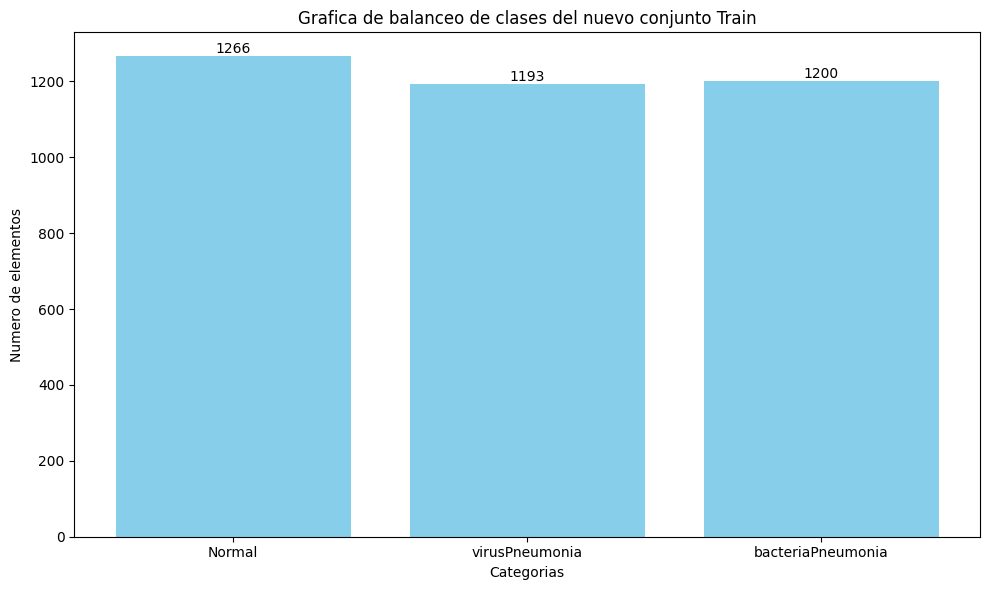

In [ ]:
s = {}
dirs = ['MLDS2_Project_Data_Split/train/Normal',
        'MLDS2_Project_Data_Split/train/virusPneumonia',
        'MLDS2_Project_Data_Split/train/bacteriaPneumonia']
for dir in dirs:
  key = dir.split('/')[2]
  s[key] = count_files_in_subdirs(dir)

plot_barchart(s, 'Grafica de balanceo de clases del nuevo conjunto Train')

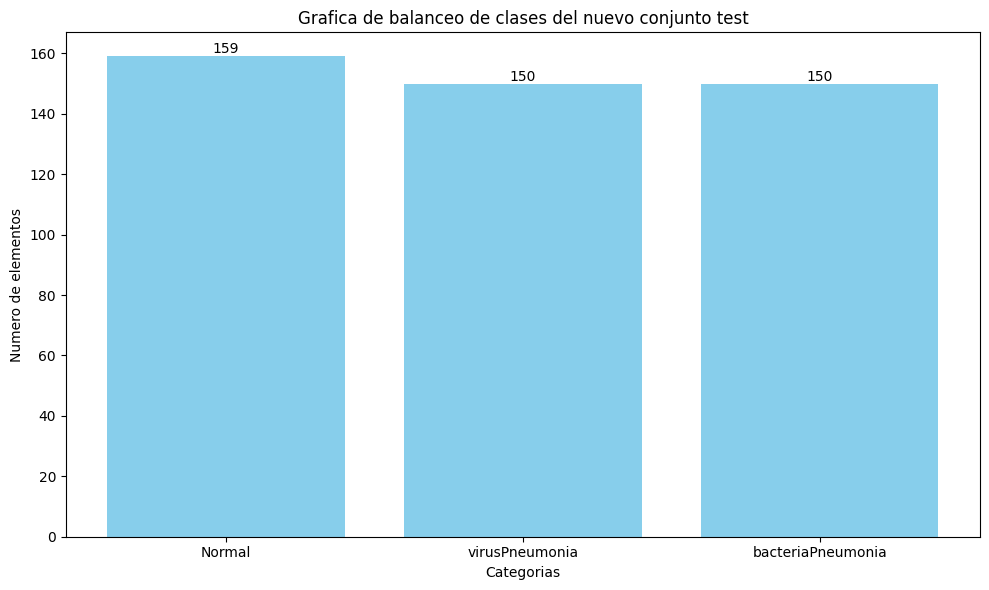

In [ ]:
s = {}
dirs = ['MLDS2_Project_Data_Split/test/Normal',
        'MLDS2_Project_Data_Split/test/virusPneumonia',
        'MLDS2_Project_Data_Split/test/bacteriaPneumonia']
for dir in dirs:
  key = dir.split('/')[2]
  s[key] = count_files_in_subdirs(dir)

plot_barchart(s, 'Grafica de balanceo de clases del nuevo conjunto test')

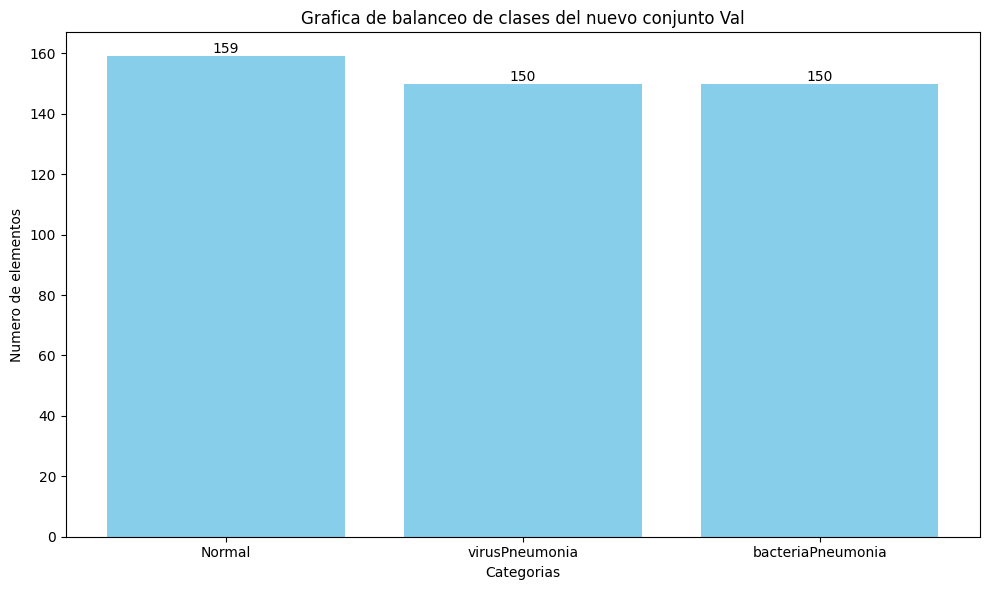

In [ ]:
s = {}
dirs = ['MLDS2_Project_Data_Split/val/Normal',
        'MLDS2_Project_Data_Split/val/virusPneumonia',
        'MLDS2_Project_Data_Split/val/bacteriaPneumonia']
for dir in dirs:
  key = dir.split('/')[2]
  s[key] = count_files_in_subdirs(dir)

plot_barchart(s, 'Grafica de balanceo de clases del nuevo conjunto Val')

## **6. Selección y diseño de modelos**
---

Para abordar el problema de clasificación de imágenes en el diagnóstico de neumonía a partir de radiografías, hemos seleccionado los modelos VGG16 y EfficientNetB0, ambos disponibles en TensorFlow. Esta elección se justifica debido a que ambos modelos son redes neuronales convolucionales bien probadas en tareas de reconocimiento de imágenes y permiten capturar características visuales esenciales en radiografías. VGG16, con su arquitectura profunda y secuencial, es eficaz en detectar patrones sutiles y texturas asociadas a los signos de neumonía, como opacidades pulmonares; mientras que EfficientNetB0 se distingue por su capacidad de procesamiento optimizada y eficiente, lo que es ideal para implementaciones en tiempo real sin comprometer precisión. Además, se implementará transfer learning utilizando modelos preentrenados, lo que permitirá aprovechar características previamente aprendidas en grandes conjuntos de datos, acelerando el entrenamiento y mejorando la generalización en nuestro conjunto de datos específico. Al combinar ambos modelos, podemos lograr un balance entre precisión y velocidad, mejorando la fiabilidad diagnóstica. Además, ambos modelos se pueden adaptar añadiendo capas densas y técnicas como dropout o normalización para ajustarse mejor a las necesidades específicas del conjunto de datos, maximizando así el rendimiento en la tarea de clasificación.

Adicionalmente, las imagenes deben redimensionarse para tener una dimensión esprcifica para el modelo

#### Redimensionamiento de Imagenes

In [ ]:
# Ruta a la carpeta con las imágenes
folder_path = "MLDS2_Project_Data_Split/test/virusPneumonia"

# Inicializar variables para el cálculo del promedio
aspect_ratios = []

# Iterar sobre cada archivo en la carpeta
for filename in os.listdir(folder_path):
    image_path = os.path.join(folder_path, filename)
    try:
        with Image.open(image_path) as img:
            width, height = img.size
            aspect_ratio = width / height
            aspect_ratios.append(aspect_ratio)
    except Exception as e:
        print(f"Error al procesar {filename}: {e}")

# Calcular el promedio de la relación de aspecto
if aspect_ratios:
    average_aspect_ratio = sum(aspect_ratios) / len(aspect_ratios)
    print(f"Promedio de la relación de aspecto: {average_aspect_ratio}")
else:
    print("No se encontraron imágenes para calcular la relación de aspecto.")

Promedio de la relación de aspecto: 1.510154902951226


Al final, determinamos que se realizará el reescalamiento de las imágenes del dataset a las siguientes dimensiones.

Ancho $ = 1.53 \, \cdot\, 500 = 765$

Alto $ =  500$

In [ ]:
dirs = [
    'MLDS2_Project_Data_Split/val/Normal',
    'MLDS2_Project_Data_Split/val/virusPneumonia',
    'MLDS2_Project_Data_Split/val/bacteriaPneumonia',
    'MLDS2_Project_Data_Split/test/Normal',
    'MLDS2_Project_Data_Split/test/virusPneumonia',
    'MLDS2_Project_Data_Split/test/bacteriaPneumonia',
    'MLDS2_Project_Data_Split/train/Normal',
    'MLDS2_Project_Data_Split/train/virusPneumonia',
    'MLDS2_Project_Data_Split/train/bacteriaPneumonia'
]


new_width = int(1.53 * 500)
new_height = 500
new_size = (new_width, new_height)

for folder_path in dirs:
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        try:
            with Image.open(image_path) as img:
                resized_img = img.resize(new_size, Image.LANCZOS)
                resized_img.save(image_path)
        except Exception as e:
            print(f"Error al procesar {image_path}: {e}")
print('Imagenes redimensionadas satisfactoriamente')

Error al procesar MLDS2_Project_Data_Split/val/Normal/.DS_Store: cannot identify image file '/content/MLDS2_Project_Data_Split/val/Normal/.DS_Store'
Imagenes redimensionadas satisfactoriamente


Definimos ahora los objetos que nos permiten obtener las imagenes y aplicar Data Augmentation para luego ser aplicados al modelo.

In [ ]:
train_dir = 'MLDS2_Project_Data_Split/train'
validation_dir = 'MLDS2_Project_Data_Split/val'
test_dir = 'MLDS2_Project_Data_Split/test'

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomTranslation(0.2, 0.2),
    tf.keras.layers.Rescaling(1./255)
])

easy_rescaling = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255)
])

def load_and_augment_images_from_directory(directory, batch_size, image_size=(765, 500)):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        image_size=image_size,
        batch_size=batch_size,
        label_mode='categorical',
        shuffle=True
    )
    dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y))
    return dataset

def load_images_from_directory(directory, batch_size, image_size=(765, 500)):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        image_size=image_size,
        batch_size=batch_size,
        label_mode='categorical',
        shuffle=True
    )
    dataset = dataset.map(lambda x, y: (easy_rescaling(x, training=True), y))
    return dataset

def load_test_images_from_directory(directory, batch_size, image_size=(765, 500)):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        image_size=image_size,
        batch_size=batch_size,
        label_mode='categorical',
        shuffle=False  # Important for evaluation
    )
    # Get class names before any transformations
    class_names = dataset.class_names
    dataset = dataset.map(lambda x, y: (easy_rescaling(x, training=False), y))
    return dataset, class_names

batch_size = 32
train_dataset = load_and_augment_images_from_directory(train_dir, batch_size)
test_dataset, class_names = load_test_images_from_directory(test_dir, batch_size=batch_size)
val_dataset = load_images_from_directory(validation_dir, batch_size)

# Prefetch for performance optimization
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)


Found 3659 files belonging to 3 classes.
Found 459 files belonging to 3 classes.
Found 458 files belonging to 3 classes.


#### Carga de Modelos Preentrenados

Usaremos los modelos preentrenados VGG16 y EfficientNetB0

In [ ]:
# Cargamos una red VGG16
model_VGG16 = tf.keras.applications.VGG16(weights='imagenet',
                                    include_top=False,
                                    input_shape=(765, 500, 3))
for layer in model_VGG16.layers:
    layer.trainable=False
model_VGG16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 765, 500, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 765, 500, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 765, 500, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 382, 250, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 382, 250, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 382, 250, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 191, 125, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 191, 125, 256)       │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 191, 125, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 191, 125, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 95, 62, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 95, 62, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 95, 62, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 95, 62, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 47, 31, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 47, 31, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 47, 31, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 47, 31, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 23, 15, 512)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Cargamos una red EfficientNetB0
model_EfficentNetB0 = tf.keras.applications.EfficientNetB0(weights='imagenet',
                                            include_top=False,
                                            input_shape=(765, 500, 3))
for layer in model_EfficentNetB0.layers:
    layer.trainable=False
model_EfficentNetB0.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 765, 500, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 765, 500, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 765, 500, 3)    │              7 │ rescaling_2[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_3 (Rescaling)   │ (None, 765, 500, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 767, 501, 3)    │              0 │ rescaling_3[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 383, 250, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 383, 250, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 383, 250, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 383, 250, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 383, 250, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 383, 250, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

#### Definición de capas densas

Ya teniendo los modelos preentrenados, generamos una funcion que dado un modelo preentrenado, genere dos configuraciones de capas densas al final de este que nos permita generar distintos modelos para comparar. Con esto, la idea es generar cuatro modelos entrenables diferentes que se puedan entrenar y evaluar

In [ ]:
#Modelo con dos capas densas con regularizacion
def configModelV1(baseModel, lr = 1e-3):
  input = layers.Input(shape=(765, 500, 3))
  x = baseModel(input)
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(512, activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(256, activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(0.3)(x)
  output = layers.Dense(3, activation='softmax')(x)
  complete_model = models.Model(inputs=input, outputs=output)
  complete_model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
      loss='categorical_crossentropy',
      metrics=['accuracy',
              tf.keras.metrics.TopKCategoricalAccuracy(k=2, name='top_2_accuracy'),
              tf.keras.metrics.AUC(multi_label=True)]
  )
  return complete_model

#Modelo con tres capas densas con regularizacion
def configModelV2(baseModel, lr = 1e-3):
  input = layers.Input(shape=(765, 500, 3))
  x = baseModel(input)
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(128, activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(64, activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(0.3)(x)
  x = layers.Dense(32, activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(0.2)(x)
  output = layers.Dense(3, activation='softmax')(x)
  complete_model = models.Model(inputs=input, outputs=output)
  complete_model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
      loss='categorical_crossentropy',
      metrics=['accuracy',
              tf.keras.metrics.TopKCategoricalAccuracy(k=2, name='top_2_accuracy'),
              tf.keras.metrics.AUC(multi_label=True)]
  )
  return complete_model

Generamos las cuatro configuraciones de modelos base

In [ ]:
model_VGG16_1 = configModelV1(model_VGG16)
model_VGG16_2 = configModelV2(model_VGG16)
model_EfficentNetB0_1 = configModelV1(model_EfficentNetB0)
model_EfficentNetB0_2 = configModelV2(model_EfficentNetB0)

In [ ]:
model_VGG16_1.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 765, 500, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 23, 15, 512)         │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,112,515 (57.65 MB)

 Trainable params: 396,291 (1.51 MB)

 Non-trainable params: 14,716,224 (56.14 MB)

In [ ]:
model_VGG16_2.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 765, 500, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 23, 15, 512)         │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,791,683 (56.43 MB)

 Trainable params: 76,547 (299.01 KB)

 Non-trainable params: 14,715,136 (56.13 MB)

In [ ]:
model_EfficentNetB0_1.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 765, 500, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 24, 16, 1280)        │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,840,614 (18.47 MB)

 Trainable params: 789,507 (3.01 MB)

 Non-trainable params: 4,051,107 (15.45 MB)

In [ ]:
model_EfficentNetB0_2.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 765, 500, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 24, 16, 1280)        │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,224,870 (16.12 MB)

 Trainable params: 174,851 (683.01 KB)

 Non-trainable params: 4,050,019 (15.45 MB)

Finalmente, definimos las rutinas de entrenamiento

In [ ]:
# Función para crear los callbacks
def create_callbacks(model_name):
    # Checkpoint para guardar el mejor modelo
    checkpoint = ModelCheckpoint(
        f'best_{model_name}.keras',
        monitor='val_accuracy',
        mode='max',
        save_best_only=True,
        verbose=1
    )

    # Early stopping para prevenir overfitting
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    # Reducción de learning rate cuando el entrenamiento se estanca
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )

    return [checkpoint, early_stopping, reduce_lr]

# Función para entrenar un modelo
def train_model(model, model_name, train_data, validation_data, epochs=10):
    # Create callbacks
    callbacks = create_callbacks(model_name)

    # Train the model
    history = model.fit(
        train_data,
        epochs=epochs,
        validation_data=validation_data,
        callbacks=callbacks,
        verbose=1
    )

    return history

# Función para visualizar el entrenamiento
def plot_training_history(history, model_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Gráfica de accuracy
    ax1.plot(history.history['accuracy'], label='train')
    ax1.plot(history.history['val_accuracy'], label='validation')
    ax1.set_title(f'{model_name} - Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    # Gráfica de loss
    ax2.plot(history.history['loss'], label='train')
    ax2.plot(history.history['val_loss'], label='validation')
    ax2.set_title(f'{model_name} - Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    plt.tight_layout()
    plt.show()

## **7. Entrenamiento del Modelo y Selección de Hiperparámetros**
---

Entrenamos cada uno de los modelos, y guardamos sus respectivos pesos para usarlos mas adelante. Las diferentes configuraciones serán nuestra representación de hiperparametros. Por consiguiente, nuestro objetivo será determinar cual de las cuatro configuraciones diseñadas será la más adecuada para la tarea propuesta

In [ ]:
# ---**INGRESE SU CÓDIGO**---
print("Entrenando modelo EfficientNetB0 versión 1")
efficientnet1_history = train_model(
    model_EfficentNetB0_1,
    'efficientnet1',
    train_dataset,
    val_dataset,
    epochs=10
)

model_EfficentNetB0_1.save('final_efficientnet1_model.h5')

Entrenando modelo EfficientNetB0 versión 1
Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3244 - auc_2: 0.4944 - loss: 1.5734 - top_2_accuracy: 0.6688
Epoch 1: val_accuracy improved from -inf to 0.34641, saving model to best_efficientnet1.keras
115/115 ━━━━━━━━━━━━━━━━━━━━ 584s 5s/step - accuracy: 0.3244 - auc_2: 0.4945 - loss: 1.5726 - top_2_accuracy: 0.6688 - val_accuracy: 0.3464 - val_auc_2: 0.5000 - val_loss: 1.1163 - val_top_2_accuracy: 0.6732 - learning_rate: 0.0010
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3420 - auc_2: 0.5079 - loss: 1.3103 - top_2_accuracy: 0.6706
Epoch 2: val_accuracy did not improve from 0.34641
115/115 ━━━━━━━━━━━━━━━━━━━━ 491s 4s/step - accuracy: 0.3420 - auc_2: 0.5078 - loss: 1.3102 - top_2_accuracy: 0.6705 - val_accuracy: 0.3268 - val_auc_2: 0.5000 - val_loss: 1.1146 - val_top_2_accuracy: 0.6536 - learning_rate: 0.0010
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3447 - auc_2: 0.5082 - loss: 1.

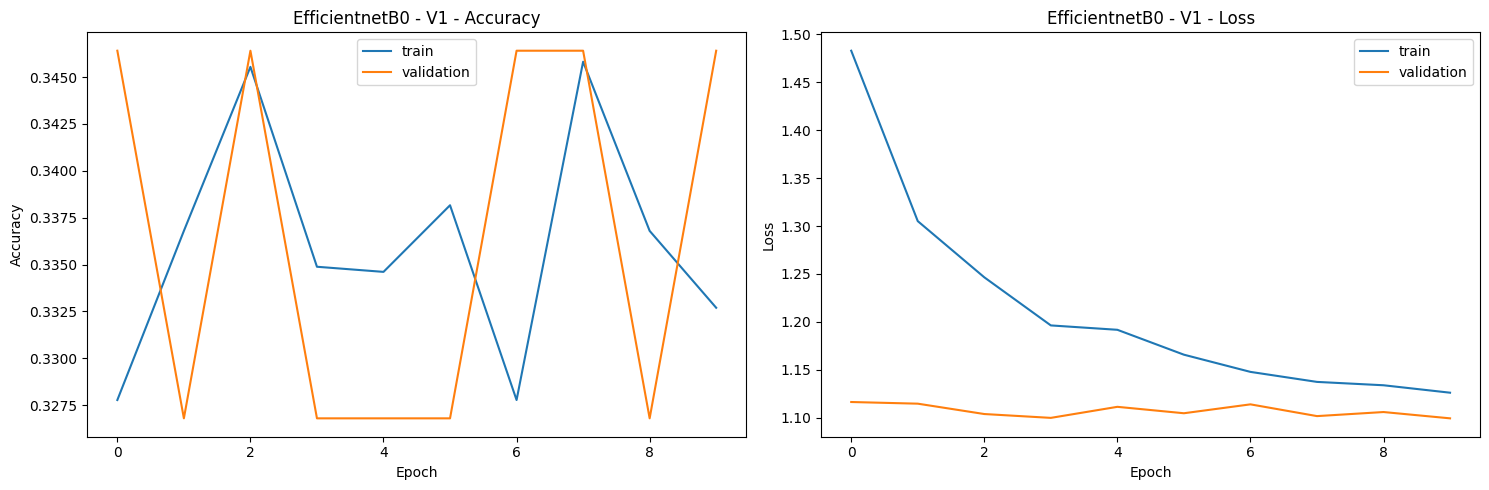

In [ ]:
plot_training_history(efficientnet1_history, 'EfficientnetB0 - V1')

In [ ]:
# ---**INGRESE SU CÓDIGO**---
print("Entrenando modelo EfficientNetB0 versión 2")
efficientnet2_history = train_model(
    model_EfficentNetB0_2,
    'efficientnet2',
    train_dataset,
    val_dataset,
    epochs=10
)

model_EfficentNetB0_2.save('final_efficientnet2_model.h5')

Entrenando modelo EfficientNetB0 versión 2
Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3258 - auc_3: 0.4867 - loss: 1.5738 - top_2_accuracy: 0.6425
Epoch 1: val_accuracy improved from -inf to 0.32680, saving model to best_efficientnet2.keras
115/115 ━━━━━━━━━━━━━━━━━━━━ 571s 5s/step - accuracy: 0.3258 - auc_3: 0.4868 - loss: 1.5728 - top_2_accuracy: 0.6427 - val_accuracy: 0.3268 - val_auc_3: 0.5000 - val_loss: 1.1003 - val_top_2_accuracy: 0.6732 - learning_rate: 0.0010
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3398 - auc_3: 0.5098 - loss: 1.2983 - top_2_accuracy: 0.6616
Epoch 2: val_accuracy improved from 0.32680 to 0.34641, saving model to best_efficientnet2.keras
115/115 ━━━━━━━━━━━━━━━━━━━━ 488s 4s/step - accuracy: 0.3398 - auc_3: 0.5098 - loss: 1.2981 - top_2_accuracy: 0.6617 - val_accuracy: 0.3464 - val_auc_3: 0.5000 - val_loss: 1.1080 - val_top_2_accuracy: 0.6732 - learning_rate: 0.0010
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step

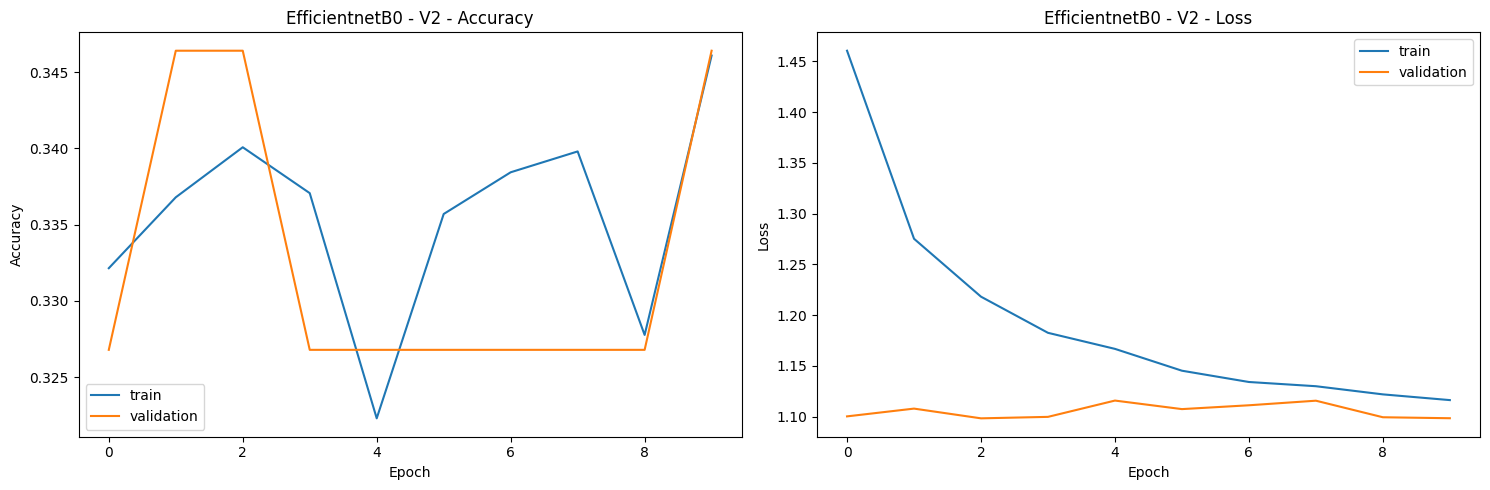

In [ ]:
plot_training_history(efficientnet2_history, 'EfficientnetB0 - V2')

In [ ]:
# ---**INGRESE SU CÓDIGO**---
print("Entrenando modelo VGG16 versión 1")
vgg161_history = train_model(
    model_VGG16_1,
    'vgg161',
    train_dataset,
    val_dataset,
    epochs=10
)

model_VGG16_1.save('final_vgg161_model.h5')

Entrenando modelo VGG16 versión 1
Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5749 - auc: 0.7646 - loss: 1.1283 - top_2_accuracy: 0.8739
Epoch 1: val_accuracy improved from -inf to 0.55991, saving model to best_vgg161.keras
115/115 ━━━━━━━━━━━━━━━━━━━━ 684s 5s/step - accuracy: 0.5752 - auc: 0.7648 - loss: 1.1273 - top_2_accuracy: 0.8741 - val_accuracy: 0.5599 - val_auc: 0.8569 - val_loss: 0.9806 - val_top_2_accuracy: 0.9521 - learning_rate: 0.0010
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6568 - auc: 0.8140 - loss: 0.8697 - top_2_accuracy: 0.9049
Epoch 2: val_accuracy improved from 0.55991 to 0.57734, saving model to best_vgg161.keras
115/115 ━━━━━━━━━━━━━━━━━━━━ 581s 5s/step - accuracy: 0.6568 - auc: 0.8140 - loss: 0.8695 - top_2_accuracy: 0.9049 - val_accuracy: 0.5773 - val_auc: 0.8782 - val_loss: 0.8807 - val_top_2_accuracy: 0.9455 - learning_rate: 0.0010
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6907 - auc: 0.8394 -

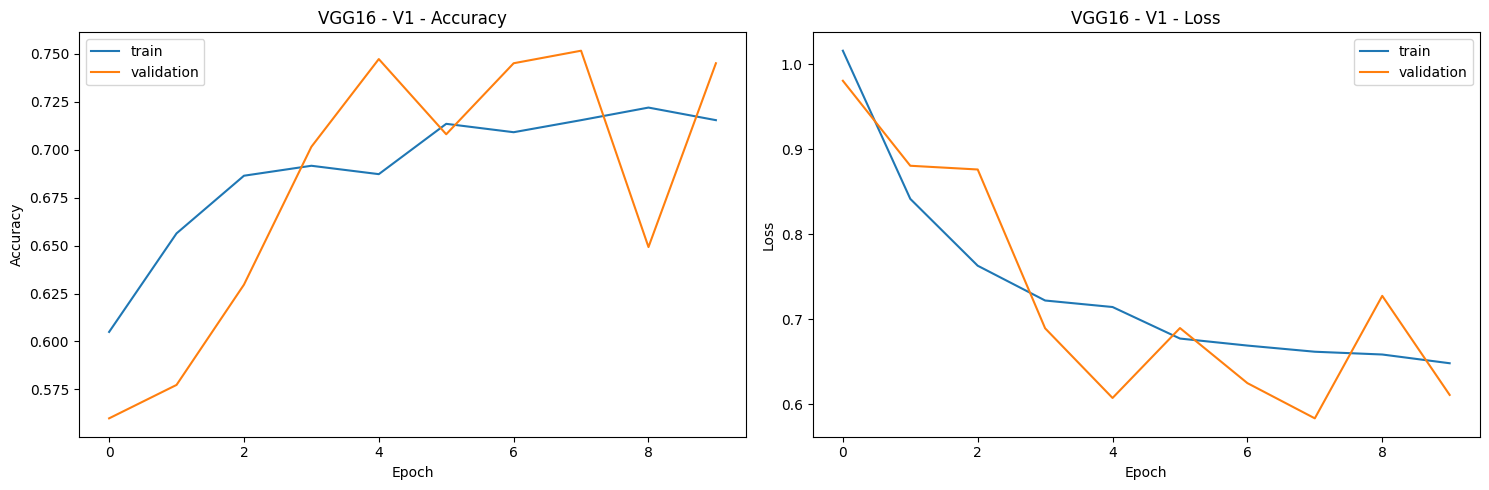

In [ ]:
plot_training_history(vgg161_history, 'VGG16 - V1')

In [ ]:
# ---**INGRESE SU CÓDIGO**---
print("Entrenando modelo VGG16 versión 2")
vgg162_history = train_model(
    model_VGG16_2,
    'vgg162',
    train_dataset,
    val_dataset,
    epochs=10
)

model_EfficentNetB0_1.save('final_vgg162_model.h5')

Entrenando modelo VGG16 versión 2
Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4705 - auc_1: 0.6540 - loss: 1.2116 - top_2_accuracy: 0.7945
Epoch 1: val_accuracy improved from -inf to 0.32898, saving model to best_vgg162.keras
115/115 ━━━━━━━━━━━━━━━━━━━━ 682s 5s/step - accuracy: 0.4711 - auc_1: 0.6546 - loss: 1.2102 - top_2_accuracy: 0.7949 - val_accuracy: 0.3290 - val_auc_1: 0.8168 - val_loss: 1.0528 - val_top_2_accuracy: 0.9150 - learning_rate: 0.0010
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6030 - auc_1: 0.7835 - loss: 0.8785 - top_2_accuracy: 0.8819
Epoch 2: val_accuracy did not improve from 0.32898
115/115 ━━━━━━━━━━━━━━━━━━━━ 577s 5s/step - accuracy: 0.6031 - auc_1: 0.7836 - loss: 0.8783 - top_2_accuracy: 0.8820 - val_accuracy: 0.3268 - val_auc_1: 0.8520 - val_loss: 1.0548 - val_top_2_accuracy: 0.7102 - learning_rate: 0.0010
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6279 - auc_1: 0.8057 - loss: 0.8173 - top_2_acc

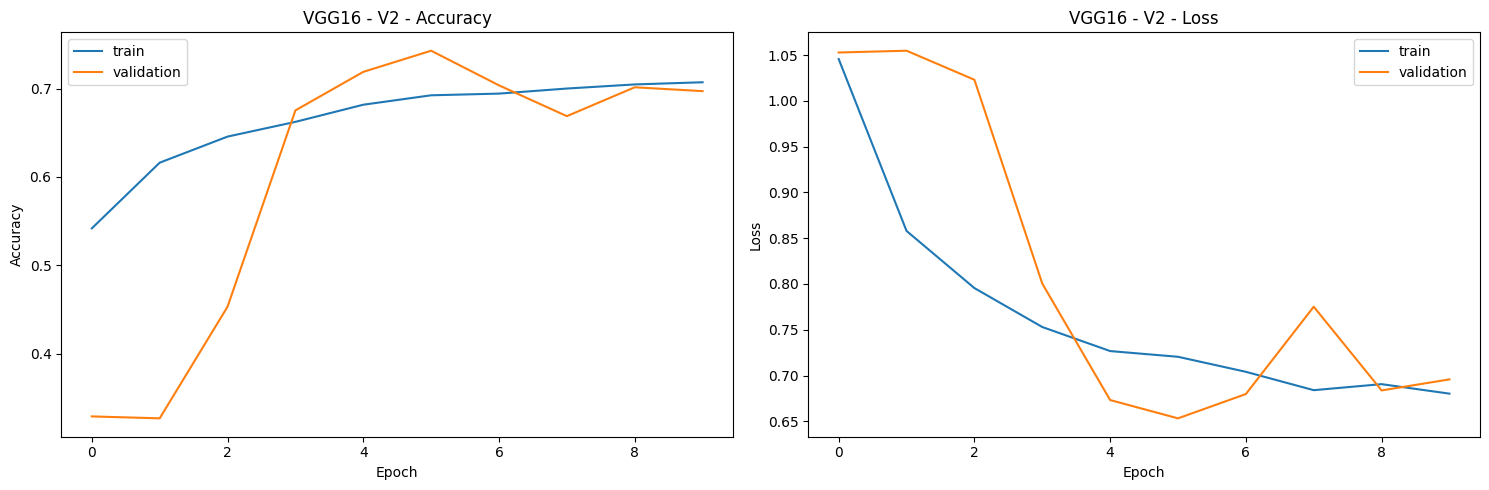

In [ ]:
plot_training_history(vgg162_history, 'VGG16 - V2')

## **8. Evaluación o Aplicación del modelo**
---

Para este modelo, vamos a visualizar las metricas generadas por el classification report y visualizaremos la matriz de confusion.

Adicionalmente, se tendrá la metrics AUC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
weights_path = '/content/drive/Shareddrives/MLDS 2/Proyecto Deep Learning/Entregables (Notebooks)/Best Weights'

for filename in os.listdir(weights_path):
    print("File:", filename)

File: final_efficientnet1_model.h5
File: best_efficientnet2.keras
File: final_efficientnet2_model.h5
File: best_vgg161.keras
File: final_vgg161_model.h5
File: best_vgg162.keras
File: final_vgg162_model.h5


Cargamos los mejores pesos obtenidos de los modelos

In [ ]:
model_VGG16_1 = configModelV1(model_VGG16)
model_VGG16_1.load_weights(weights_path+'/best_vgg161.keras')

model_VGG16_2 = configModelV2(model_VGG16)
model_VGG16_2.load_weights(weights_path+'/best_vgg162.keras')

model_EfficentNetB0_1 = configModelV1(model_EfficentNetB0)
model_EfficentNetB0_1.load_weights(weights_path+'/final_efficientnet1_model.h5')

model_EfficentNetB0_2 = configModelV2(model_EfficentNetB0)
model_EfficentNetB0_2.load_weights(weights_path+'/best_efficientnet2.keras')


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Hacemos una rutina que dado un modelo y el conjunto de datos de prueba, se genere el reporte de metricas y una matriz de confusión con las tres clases

In [ ]:
def getModelTestResults(model, testData, class_names, name="default"):
    # Make predictions
    predictions = model.predict(testData)
    predicted_classes = np.argmax(predictions, axis=1)

    # Collect true labels from the test dataset
    true_labels = np.concatenate([y for x, y in testData], axis=0)
    true_classes = np.argmax(true_labels, axis=1)  # Convert true labels to class indices if one-hot encoded

    # Generate and print the classification report
    report = classification_report(true_classes, predicted_classes, target_names=class_names, zero_division=0)

    # Generate the confusion matrix
    conf_matrix = confusion_matrix(true_classes, predicted_classes)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {name} model')
    plt.show()
    print()
    print(report)
    print()
    # Calculate and plot the AUC curves for each class
    plt.figure(figsize=(12, 8))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    num_classes = len(class_names)

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    colors = cycle(['blue', 'green', 'red', 'orange', 'purple'])
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name} model')
    plt.legend(loc="lower right")
    plt.show()


Ahora aplicamos esta rutina sobre los cuatro modelos realizados

15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 935ms/step


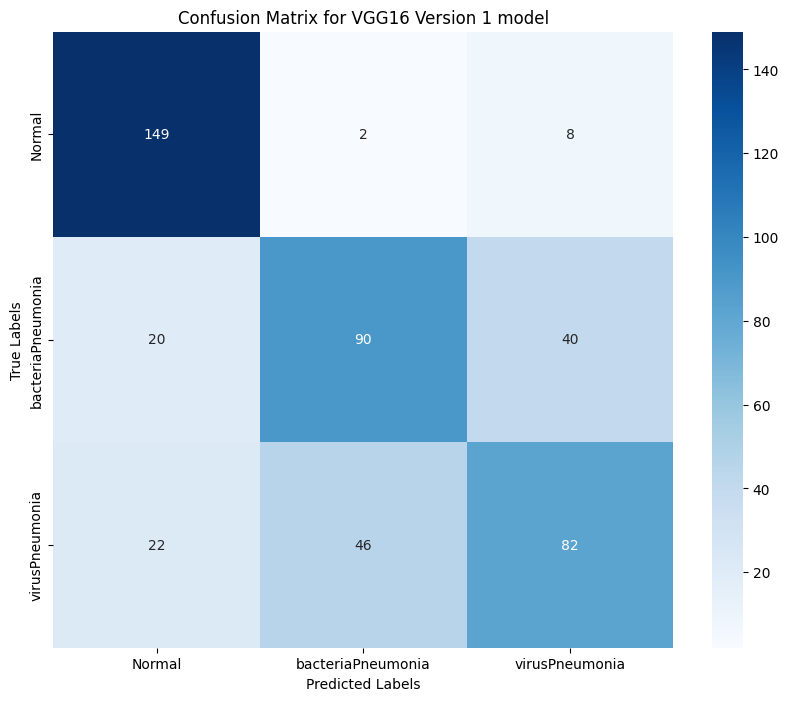


                   precision    recall  f1-score   support

           Normal       0.78      0.94      0.85       159
bacteriaPneumonia       0.65      0.60      0.62       150
   virusPneumonia       0.63      0.55      0.59       150

         accuracy                           0.70       459
        macro avg       0.69      0.69      0.69       459
     weighted avg       0.69      0.70      0.69       459




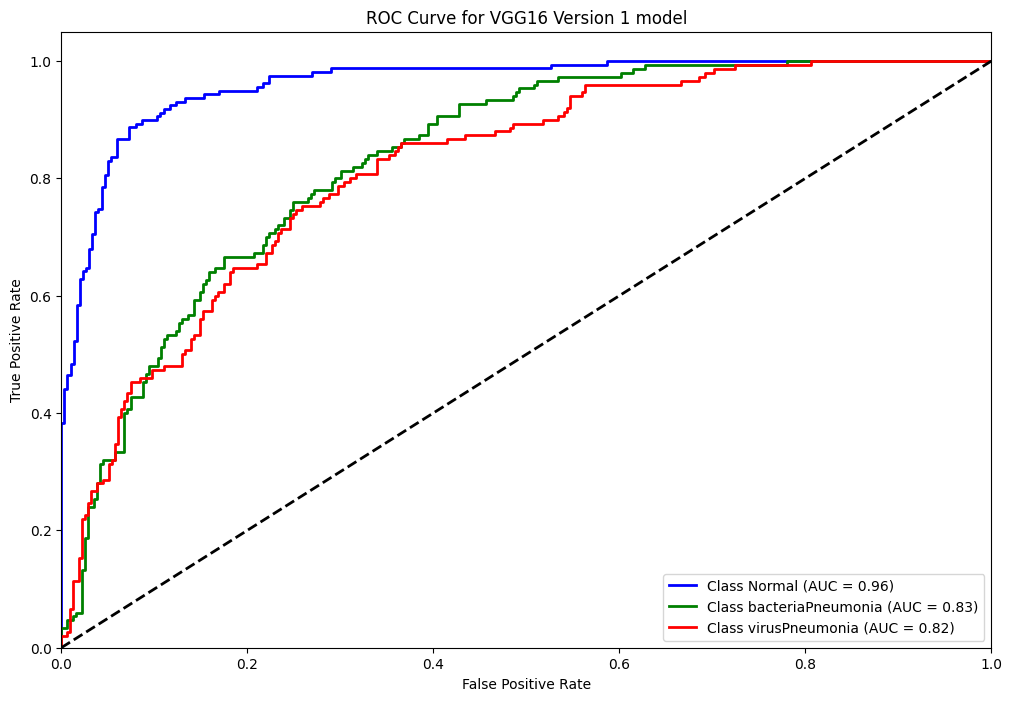

In [ ]:
getModelTestResults(model_VGG16_1, test_dataset, class_names, name = 'VGG16 Version 1')

15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 979ms/step


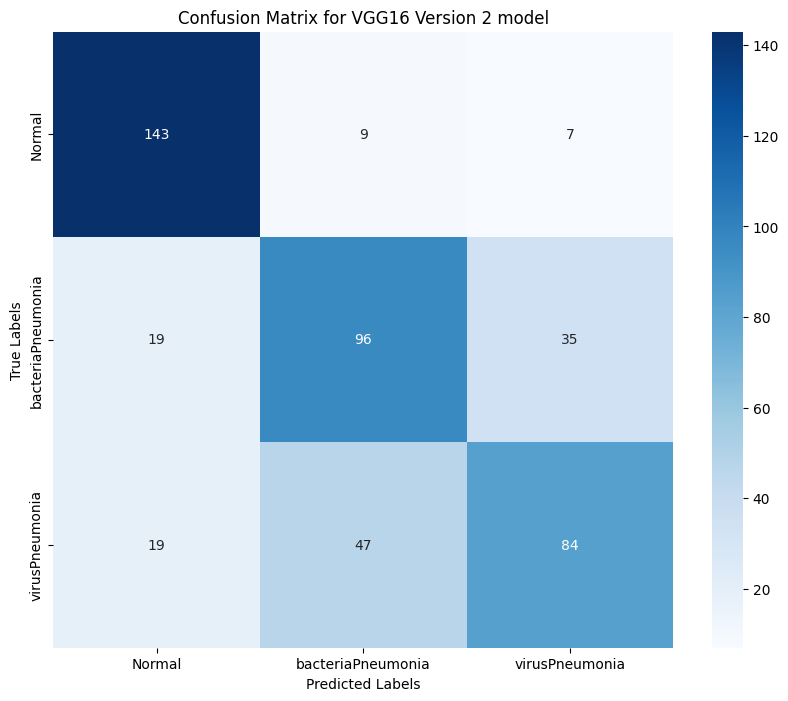


                   precision    recall  f1-score   support

           Normal       0.79      0.90      0.84       159
bacteriaPneumonia       0.63      0.64      0.64       150
   virusPneumonia       0.67      0.56      0.61       150

         accuracy                           0.70       459
        macro avg       0.70      0.70      0.70       459
     weighted avg       0.70      0.70      0.70       459




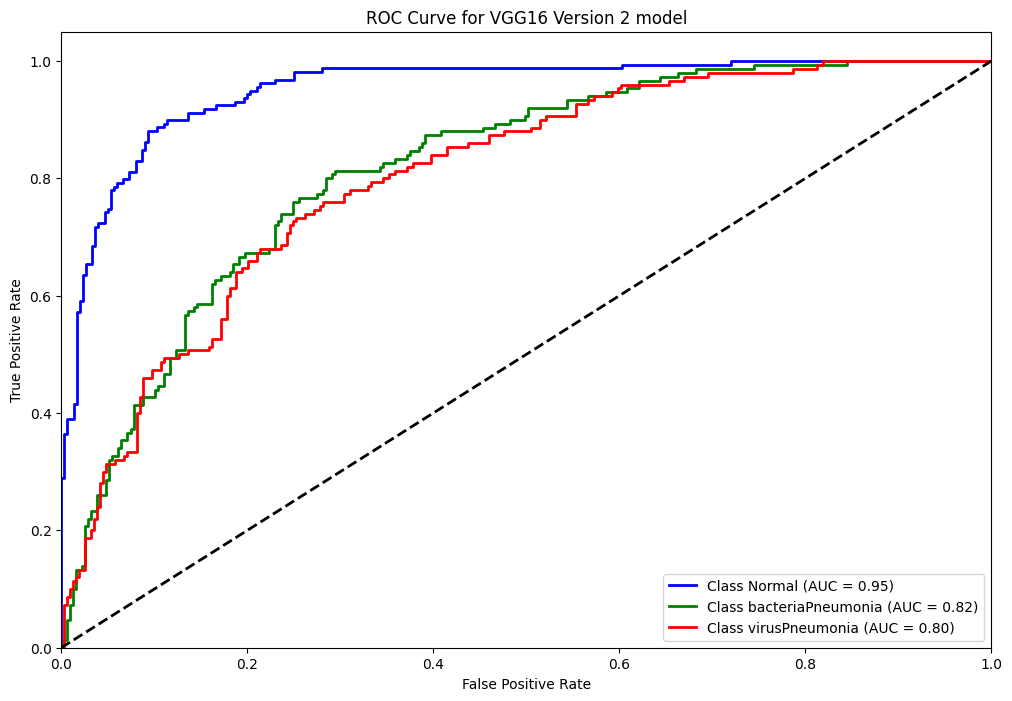

In [ ]:
getModelTestResults(model_VGG16_2, test_dataset, class_names, name = 'VGG16 Version 2')

15/15 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step


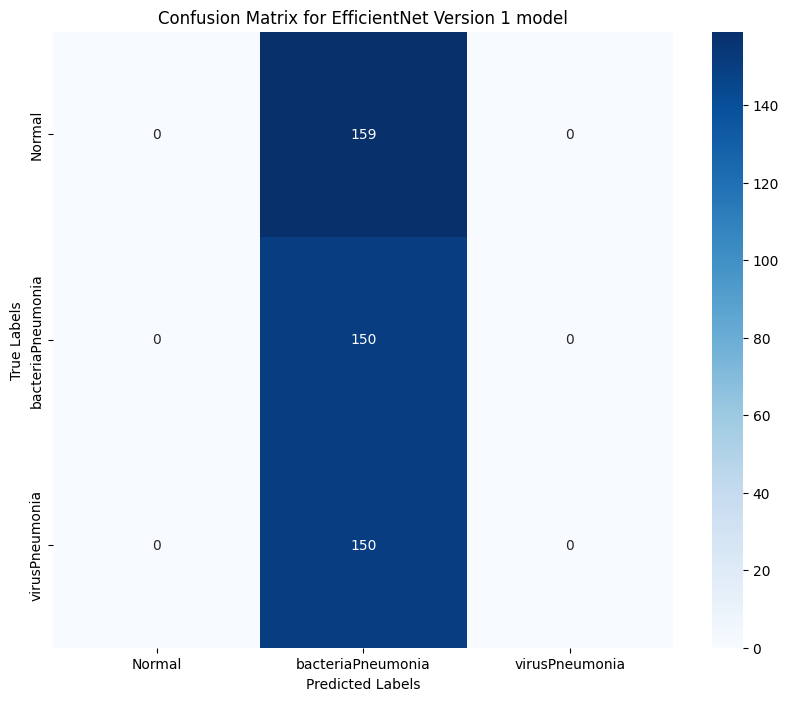


                   precision    recall  f1-score   support

           Normal       0.00      0.00      0.00       159
bacteriaPneumonia       0.33      1.00      0.49       150
   virusPneumonia       0.00      0.00      0.00       150

         accuracy                           0.33       459
        macro avg       0.11      0.33      0.16       459
     weighted avg       0.11      0.33      0.16       459




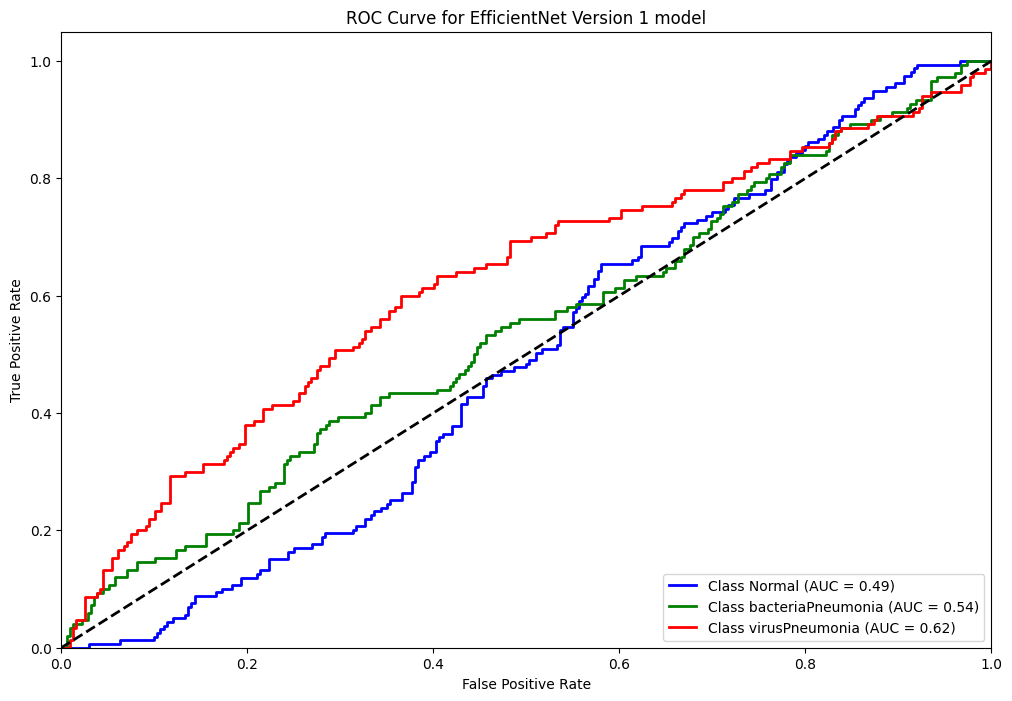

In [ ]:
getModelTestResults(model_EfficentNetB0_1, test_dataset, class_names, name = 'EfficientNet Version 1')

15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 672ms/step


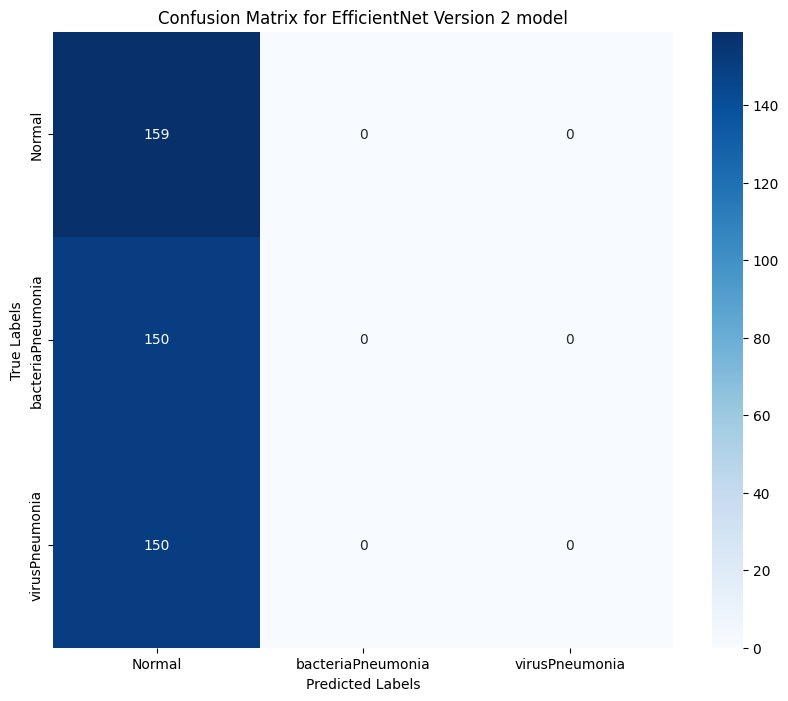


                   precision    recall  f1-score   support

           Normal       0.35      1.00      0.51       159
bacteriaPneumonia       0.00      0.00      0.00       150
   virusPneumonia       0.00      0.00      0.00       150

         accuracy                           0.35       459
        macro avg       0.12      0.33      0.17       459
     weighted avg       0.12      0.35      0.18       459




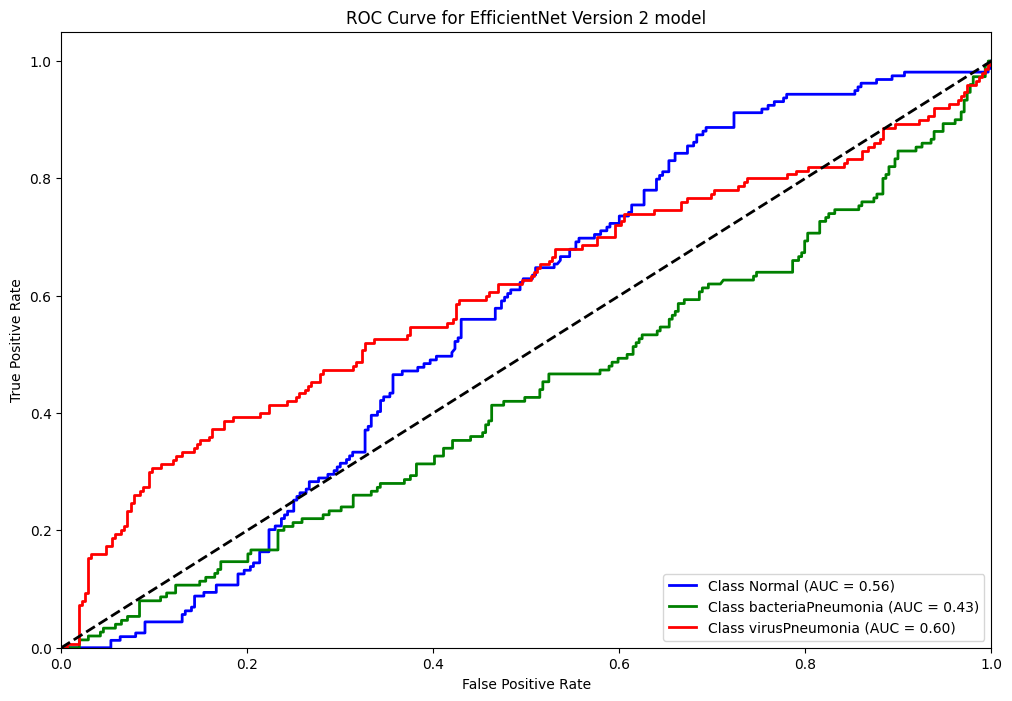

In [ ]:
getModelTestResults(model_EfficentNetB0_2, test_dataset, class_names, name = 'EfficientNet Version 2')

Al analizar el comportamiento de los tres modelos, podemos identificar que la versión uno del modelo que parte de la transferencia de aprendizaje de un modelo VGG16 es el que da mejores resultados. Este modelo es el mejor por varias razones clave:

1. **Alto rendimiento en la clase "Normal":** Tiene un recall de 0.92, lo que significa que identifica correctamente el 92% de las imágenes de esta clase, minimizando falsos negativos. Además, la precisión de 0.85 indica que es confiable al predecir esta clase.

2. **Buen balance entre precision, recall y F1-score**: En general, el modelo tiene un F1-score de 0.89 en la clase "Normal" y resultados aceptables en las otras clases, con F1-scores de 0.74 y 0.64 en "bacteriaPneumonia" y "virusPneumonia", respectivamente.

3. **Desempeño general sólido:** El modelo alcanza un accuracy del 76% y un macro avg de 0.75, lo que refleja un buen rendimiento equilibrado entre todas las clases.

En comparación con otros modelos, este muestra un mejor recall y precisión en la clase "Normal", lo cual es crucial para evitar falsos negativos. Además, su buen desempeño global y su balance entre precisión y recall lo hacen la opción más robusta.

#### Fine Tunning

Dado el modelo elegido, se decidió realizar un proceso de Fine Tunning para ver si las metricas logran mejorar en algun aspecto.

Para ello descongelamos las ultimas tres capas del modelo VGG16

In [ ]:
for layer in model_VGG16.layers[:-3]:
    layer.trainable=False

for layer in model_VGG16.layers[-3:]:
    layer.trainable=True

model_VGG16_FT = configModelV1(model_VGG16, lr = 1e-6)
model_VGG16_FT.load_weights(weights_path+'/best_vgg161.keras')

In [ ]:
model_VGG16_FT.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)          │ (None, 765, 500, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 23, 15, 512)         │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_14          │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,112,515 (57.65 MB)

 Trainable params: 5,115,907 (19.52 MB)

 Non-trainable params: 9,996,608 (38.13 MB)

In [ ]:
# ---**INGRESE SU CÓDIGO**---
print("Fine Tunning al modelo VGG16 versión 1")
vgg16FN_history = train_model(
    model_VGG16_FT,
    'vgg161_fineTunning',
    train_dataset,
    val_dataset,
    epochs=5
)

model_VGG16_FT.save('final_vgg161_fineTunning_model.h5')

Fine Tunning al modelo VGG16 versión 1
Epoch 1/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7385 - auc_14: 0.8792 - loss: 0.6227 - top_2_accuracy: 0.9439
Epoch 1: val_accuracy improved from -inf to 0.73362, saving model to best_vgg161_fineTunning.keras
115/115 ━━━━━━━━━━━━━━━━━━━━ 627s 5s/step - accuracy: 0.7385 - auc_14: 0.8792 - loss: 0.6227 - top_2_accuracy: 0.9439 - val_accuracy: 0.7336 - val_auc_14: 0.8942 - val_loss: 0.5806 - val_top_2_accuracy: 0.9760 - learning_rate: 1.0000e-06
Epoch 2/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7269 - auc_14: 0.8748 - loss: 0.6354 - top_2_accuracy: 0.9484
Epoch 2: val_accuracy did not improve from 0.73362
115/115 ━━━━━━━━━━━━━━━━━━━━ 605s 5s/step - accuracy: 0.7270 - auc_14: 0.8749 - loss: 0.6353 - top_2_accuracy: 0.9484 - val_accuracy: 0.7336 - val_auc_14: 0.8936 - val_loss: 0.5947 - val_top_2_accuracy: 0.9825 - learning_rate: 1.0000e-06
Epoch 3/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7299 - auc_14: 0.88

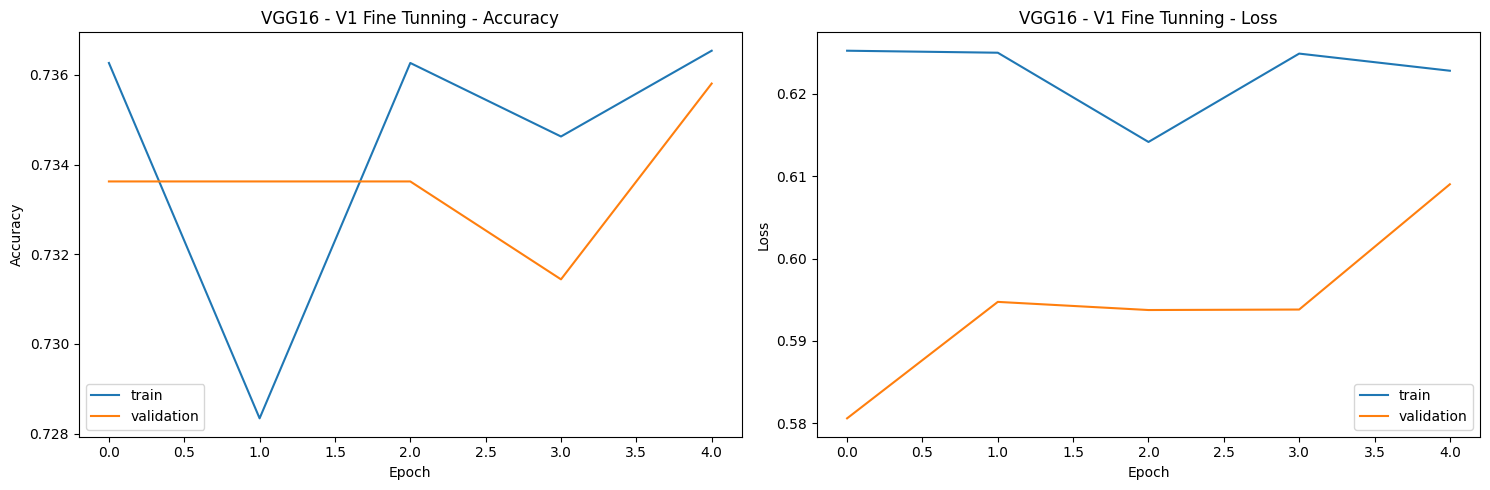

In [ ]:
plot_training_history(vgg16FN_history, 'VGG16 - V1 Fine Tunning')

Ahora revisamos si después del fine tunning el modelo mejoro o empeoro su desempeño

In [ ]:
model_VGG16_FT = configModelV1(model_VGG16, lr = 1e-6)
model_VGG16_FT.load_weights(weights_path+'/final_vgg161_fineTunning_model.h5')

15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 919ms/step


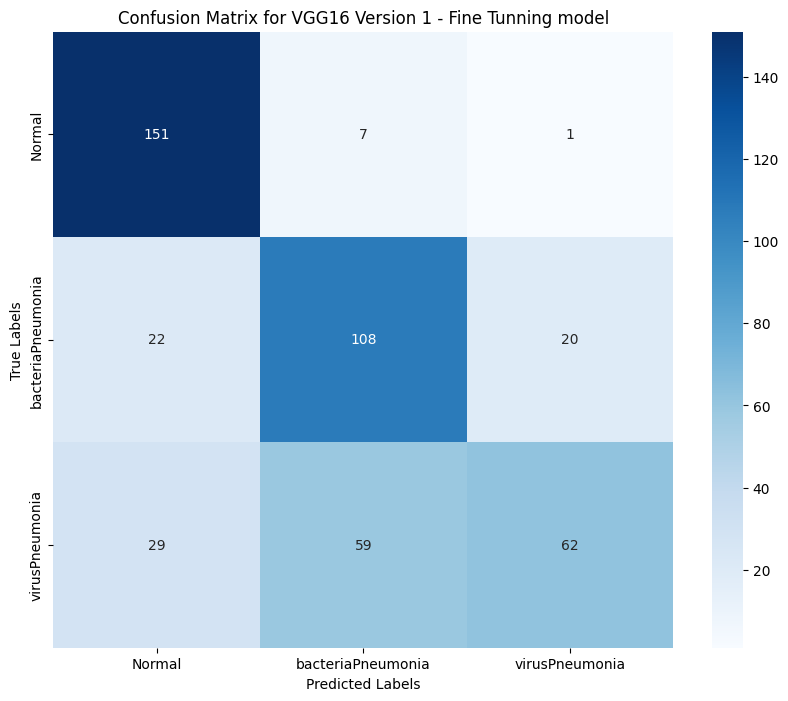


                   precision    recall  f1-score   support

           Normal       0.75      0.95      0.84       159
bacteriaPneumonia       0.62      0.72      0.67       150
   virusPneumonia       0.75      0.41      0.53       150

         accuracy                           0.70       459
        macro avg       0.71      0.69      0.68       459
     weighted avg       0.71      0.70      0.68       459




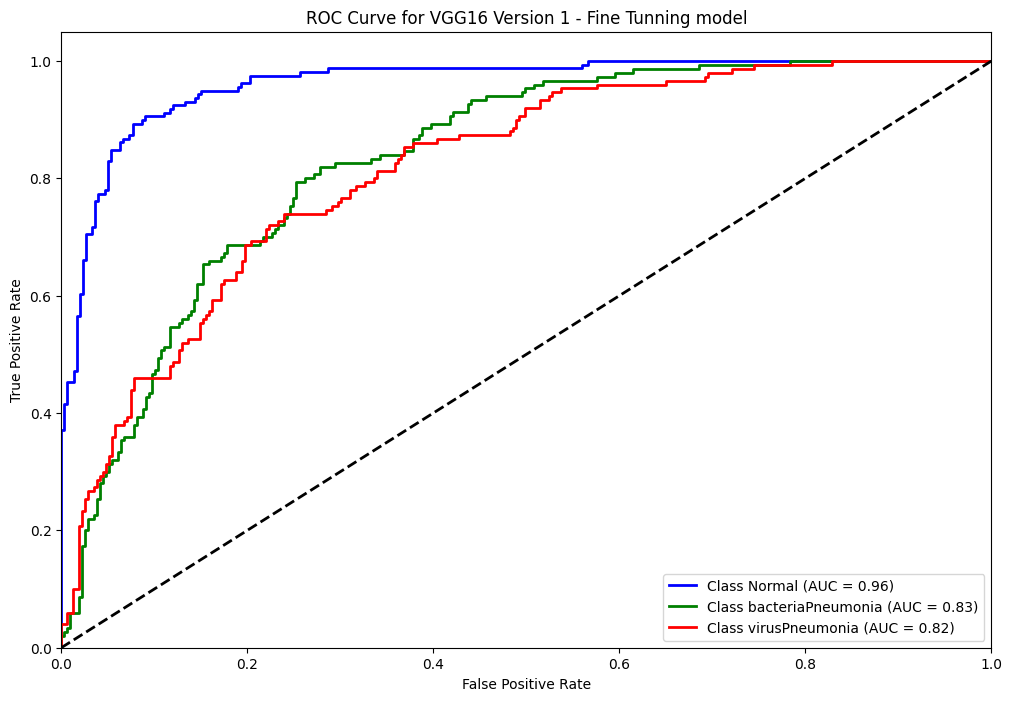

In [ ]:
getModelTestResults(model_VGG16_FT, test_dataset, class_names, name = 'VGG16 Version 1 - Fine Tunning')

El modelo original es la opción más adecuada para la tarea de distinguir entre Normal y Neumonía, ya que presenta un rendimiento más equilibrado y consistente en comparación con el modelo fine-tuned. En el caso de la clase Normal, el modelo original alcanza una precisión de 0.78 y un recall de 0.94, mientras que el modelo fine-tuned tiene una precisión de 0.75 y un recall de 0.95, mostrando una diferencia mínima. Sin embargo, en la detección de neumonía, el modelo original tiene una recall promedio de 0.575 y un F1-score de 0.605 para ambas clases de neumonía (bacteriana y viral), lo cual es superior al rendimiento del modelo fine-tuned, que presenta una recall promedio de 0.565 y un F1-score de 0.60. Además, el modelo fine-tuned muestra una baja recall de 0.41 en la neumonía viral, lo que disminuye su capacidad para discriminar entre casos normales y de neumonía. Por estas razones, el modelo original ofrece un mejor equilibrio y es más confiable para la tarea de clasificación.

## **9. Modelo final**
---

Dados los modelos y sus analisis de rendimiento en base a las diferentes métricas, se eligió el modelo que VGG16 Version 1 como aquel que tiene mejor rendimiento y se busca tener listo para un ppsible despliegue.

En ese orden de ideas, definimos un pipeline que dada una imagen, la redimensione, la reescale y la ingrese al modelo para que aplique la predicción sobre la imagen de interés

In [ ]:
easy_rescaling = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255)
])

class ImagePreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, image_size=(765, 500)):
        self.image_size = image_size

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        processed_images = []
        for img_path in X:
            img = image.load_img(img_path, target_size=self.image_size)
            img_array = image.img_to_array(img)
            img_array = easy_rescaling(img_array)  # Reescalado
            processed_images.append(img_array)
        return np.array(processed_images)  # Eliminar batch dimension extra al final

model_pipeline = Pipeline([
    ('image_preprocessor', ImagePreprocessor(image_size=(765, 500))),
    ('model', model_VGG16_1)
])

# Función para predecir una imagen
def predict_image_with_pipeline(pipeline, img_path):
    # Realizar la predicción usando el pipeline
    prediction = pipeline.predict([img_path])
    class_names = ['Normal', 'bacteriaPneumonia', 'virusPneumonia']
    predicted_class_name = class_names[np.argmax(prediction)]
    return predicted_class_name

def plotPrediction(img_path , pipeline, class_):
    name = predict_image_with_pipeline(pipeline, img_path)
    img = Image.open(img_path).convert('RGB')

    # Plot the image
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Clase Predicha: {name} - Clase Verdadera: {class_}')
    plt.show()

Lo probamos para diferentes imagenes del dataset

### Casos acertados

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


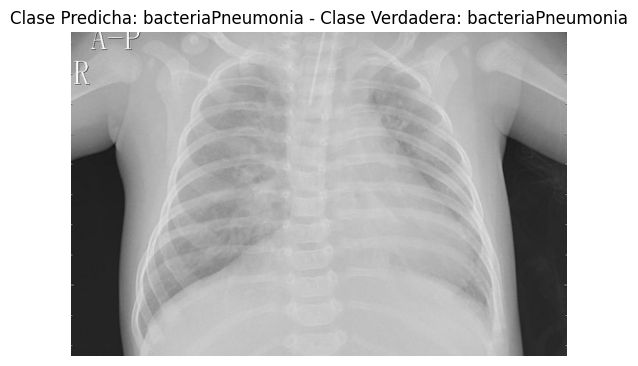

In [ ]:
folder_path = "MLDS2_Project_Data_Split/test/bacteriaPneumonia"

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        if predict_image_with_pipeline(model_pipeline, file_path) == "bacteriaPneumonia":
          plotPrediction(file_path, model_pipeline, "bacteriaPneumonia")
          break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


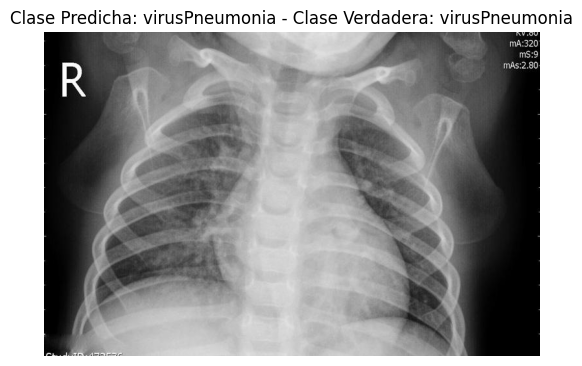

In [ ]:
folder_path = "MLDS2_Project_Data_Split/test/virusPneumonia"

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        if predict_image_with_pipeline(model_pipeline, file_path) == "virusPneumonia":
          plotPrediction(file_path, model_pipeline, "virusPneumonia")
          break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


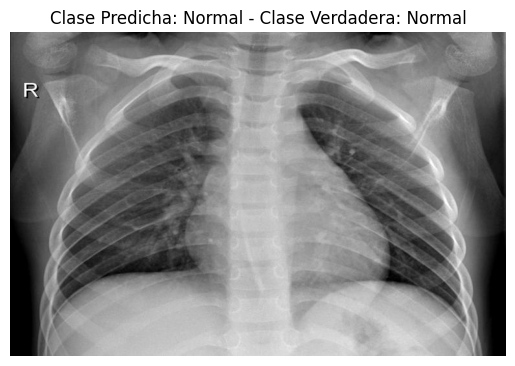

In [ ]:
folder_path = "MLDS2_Project_Data_Split/test/Normal"

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        if predict_image_with_pipeline(model_pipeline, file_path) == "Normal":
          plotPrediction(file_path, model_pipeline, "Normal")
          break

### Casos errados

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


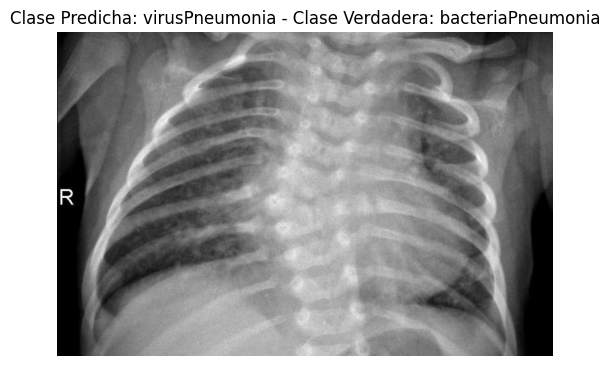

In [ ]:
folder_path = "MLDS2_Project_Data_Split/test/bacteriaPneumonia"

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        if predict_image_with_pipeline(model_pipeline, file_path) != "bacteriaPneumonia":
          plotPrediction(file_path, model_pipeline, "bacteriaPneumonia")
          break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


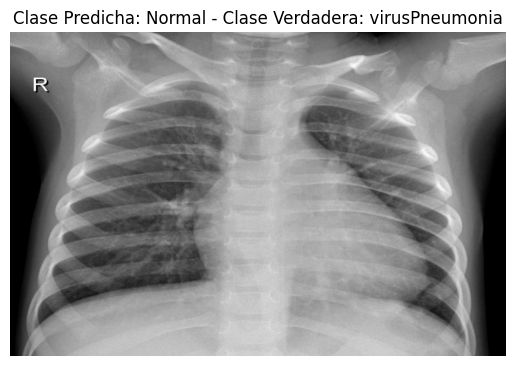

In [ ]:
folder_path = "MLDS2_Project_Data_Split/test/virusPneumonia"

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        if predict_image_with_pipeline(model_pipeline, file_path) != "virusPneumonia":
          plotPrediction(file_path, model_pipeline, "virusPneumonia")
          break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


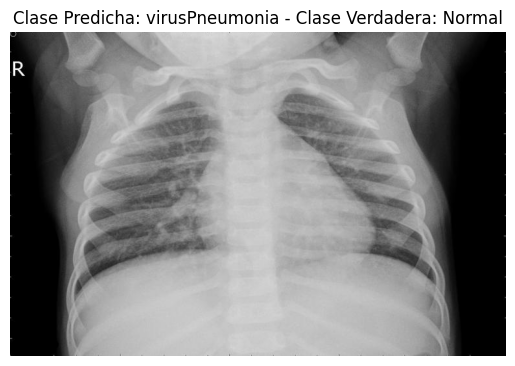

In [ ]:
folder_path = "MLDS2_Project_Data_Split/test/Normal"

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        if predict_image_with_pipeline(model_pipeline, file_path) != "Normal":
          plotPrediction(file_path, model_pipeline, "Normal")
          break

## **10. Conclusiones**
---

1. **Desbalance de Clases y Manejo del Dataset:** El dataset inicial presentaba un desbalance significativo entre las clases (normal, neumonía bacteriana y neumonía viral). Para abordar este desbalance, se utilizó una estrategia de submuestreo que permitió balancear las clases antes de realizar las particiones de entrenamiento, validación y test. Esta técnica ayudó a mitigar el sesgo hacia las clases mayoritarias y mejorar la representatividad de cada clase en el modelo.

2. **Uso de Data Augmentation:** Se aplicaron técnicas de data augmentation para enriquecer el conjunto de datos y mejorar la capacidad de generalización del modelo. Esto incluyó rotaciones, traslaciones, cambios en la escala y volteos, lo cual permitió al modelo aprender a partir de variaciones adicionales de las imágenes y evitar el sobreajuste.

3. **Uso de Transfer Learning con VGG16 y EfficientNetB0:** Se emplearon modelos de transfer learning basados en arquitecturas preentrenadas como VGG16 y EfficientNetB0 con pesos de ImageNet. Esta estrategia permitió aprovechar el conocimiento general aprendido por los modelos en ImageNet, mejorando su capacidad para clasificar las radiografías pulmonares.

4. **Desempeño de los Modelos:** Después de entrenar ambos modelos, se observó que el modelo basado en VGG16 con la configuración densa 1 (que incluía dropout en las capas densas para regularizar y evitar el sobreajuste) fue el que alcanzó los mejores resultados. Este modelo mostró una mejor capacidad para clasificar las imágenes correctamente. Por otro lado, los modelos basados en EfficientNetB0 no lograron generalizar adecuadamente, ya que predecían la misma clase para todas las imágenes, lo que sugiere un ajuste insuficiente o problemas en el proceso de transfer learning.

5. **Evaluación del Modelo:** La evaluación del modelo se realizó utilizando varias métricas clave:

  * **Curva ROC:** La curva ROC permitió visualizar el rendimiento del modelo en términos de su tasa de verdaderos positivos y falsos positivos a diferentes umbrales de clasificación, proporcionando una visión general de la capacidad discriminativa del modelo.
  * **Classification Report:** El classification report brindó información detallada sobre la precisión, recall y F1-score para cada clase. Estos indicadores mostraron el rendimiento del modelo en cada una de las categorías de la tarea de clasificación.
  * **Matriz de Confusión:** La matriz de confusión permitió visualizar las predicciones correctas e incorrectas del modelo, revelando posibles confusiones entre clases y ofreciendo una evaluación detallada de la precisión por clase.

6. **Fine-Tuning:** Se realizó fine-tuning del modelo VGG16 con la mejor configuración para ajustar las capas superiores, pero no se observó una mejora significativa en el rendimiento. Esto indica que el modelo ya estaba bastante bien ajustado para la tarea o que las modificaciones realizadas no fueron suficientes para generar una mejora considerable.

7. **Posibles Áreas de Mejora:**

  * **Modelo EfficientNetB0:** Es necesario investigar por qué el modelo EfficientNetB0 no logró mejorar el desempeño. Puede ser útil probar otras configuraciones de este modelo o ajustar las técnicas de transfer learning para que sea más efectivo en esta tarea.
  Técnicas de Regularización: Aunque el dropout se utilizó en las capas densas, explorar otras técnicas de regularización como la normalización por lotes (batch normalization) o ajustar más intensamente el dropout podría ayudar a mejorar el rendimiento del modelo.
  * **Ajuste de Hiperparámetros:** Un ajuste más exhaustivo de los hiperparámetros, como la tasa de aprendizaje, el tamaño del lote y otros parámetros, podría llevar a una mejora adicional en los resultados.

8. **Conclusión General:** El modelo basado en VGG16 con la configuración densa 1 fue el que logró el mejor rendimiento en la clasificación de radiografías pulmonares. A pesar de que el fine-tuning no produjo mejoras sustanciales, este modelo sigue siendo la opción más prometedora para la tarea. Sin embargo, se recomienda continuar con la investigación para mejorar el rendimiento, explorando diferentes configuraciones para EfficientNetB0, ajustando técnicas de regularización y realizando un ajuste más fino de los hiperparámetros.